# In-Demand Data Tech Skills: A Closer Look
---

In today's rapidly evolving digital landscape, the demand for professionals equipped with data-related skills is soaring. From data analysts to data scientists, individuals proficient in harnessing the power of data are becoming indispensable assets across industries. In this analysis, we delve into the intricacies of in-demand data tech skills, exploring the key competencies, trends, and insights shaping the data-driven ecosystem.

Through a meticulous analysis of industry demands, job market trends, and emerging technologies, we aim to provide a comprehensive overview of the data tech landscape. By examining the core skills sought after by employers, understanding the nuances of different roles, and highlighting the latest advancements in data technologies, we offer valuable insights for aspiring professionals and seasoned practitioners alike.

Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. The survey data was later open sourced by Stack Overflow. The actual data set has around 90,000 responses. The dataset used in this notebook comes from the following [source](https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in/) under a ODbL: Open Database License. **Note:** this randomised subset contains around 1/10th of the original data set. Any conclusions drawn after analyzing this subset may not reflect the real world scenario.

[This file](https://github.com/kudou88/In-Demand-Data-Tech-Skills/blob/52e1577eb7957a937c3b6c0c7223cdd450b50653/about_dataset.pdf) list the questions asked in the survey and a general description of each questions.

![Can't render image](https://raw.githubusercontent.com/kudou88/In-Demand-Data-Tech-Skills/main/data%20skills%20banner.jpg)
*Image source: [theschoolrun.com](https://www.theschoolrun.com/what-programming-language)*

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
def custom_sns():
    plt.rcParams.update({
        'figure.figsize': (8, 6),
        'figure.dpi': 100,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.grid': True,
        'grid.color': 'gray',
        'grid.linestyle': '--',
        'grid.alpha': 0.3,
        'font.family': 'serif',
        'font.size': 12,
        'lines.linewidth': 2,
        'lines.markersize': 8,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'xtick.major.size': 7,
        'ytick.major.size': 7,
        'xtick.minor.size': 4,
        'ytick.minor.size': 4,
        'xtick.major.width': 1.5,
        'ytick.major.width': 1.5,
        'xtick.minor.width': 1,
        'ytick.minor.width': 1,
        'xtick.labelsize': 'medium',
        'ytick.labelsize': 'medium',
        'legend.fontsize': 'medium',
        'legend.frameon': False,
        'savefig.transparent': True,
        'savefig.format': 'png'
    })

In [3]:
custom_sns()

# Loading Datasets

First, we will import two files that will be used in this analysis. 
- The first file *`m5_survey_data_technologies_normalised.csv`* contains a list of programming skills that are currently being used and would like to be work in over next five years (by each respondent). 
- The second file *`m5_survey_data_demographics.csv`* contains demographic information for each respondent who filled out this survey.

In [4]:
df_tech = pd.read_csv('m5_survey_data_technologies_normalised.csv')
df_demo = pd.read_csv('m5_survey_data_demographics.csv')

# Data Preprocessing
---

In [5]:
df_tech.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN


In [6]:
df_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74590 entries, 0 to 74589
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              74589 non-null  float64
 1   LanguageWorkedWith      59792 non-null  object 
 2   LanguageDesireNextYear  55764 non-null  object 
 3   DatabaseWorkedWith      31375 non-null  object 
 4   DatabaseDesireNextYear  29575 non-null  object 
 5   PlatformWorkedWith      39208 non-null  object 
 6   PlatformDesireNextYear  44314 non-null  object 
 7   WebFrameWorkedWith      24803 non-null  object 
 8   WebFrameDesireNextYear  24567 non-null  object 
 9   DevEnviron              33306 non-null  object 
 10  OpSys                   0 non-null      float64
 11  Containers              0 non-null      float64
 12  BlockchainOrg           0 non-null      float64
 13  BlockchainIs            0 non-null      float64
dtypes: float64(5), object(9)
memory usage:

In the dataframe `df_tech`, the `info` function revealed that one respondent had no data in any columns. Additionally, there are four features with no data. Consequently, both the respondent and the four features will be removed from the dataset during the handling of missing values section.

In [7]:
df_demo.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfie

In [8]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      11398 non-null  int64  
 1   MainBranch      11398 non-null  object 
 2   Hobbyist        11398 non-null  object 
 3   OpenSourcer     11398 non-null  object 
 4   OpenSource      11317 non-null  object 
 5   Employment      11398 non-null  object 
 6   Country         11398 non-null  object 
 7   Student         11347 non-null  object 
 8   EdLevel         11286 non-null  object 
 9   UndergradMajor  10661 non-null  object 
 10  EduOther        11234 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  DevType         11333 non-null  object 
 13  YearsCode       11389 non-null  object 
 14  Age1stCode      11385 non-null  object 
 15  YearsCodePro    11382 non-null  object 
 16  CareerSat       11398 non-null  object 
 17  JobSat          11397 non-null 

In `df_demo`, the features `CurrencySymbol`, `CurrencyDesc`, `CompTotal` will be removed from the dataset because the information from these three features has been used and transformed into the `ConvertedComp` feature.

In [9]:
df_demo.drop(columns=['CurrencySymbol', 'CurrencyDesc', 'CompTotal'], inplace=True)

## ● Missing Values

Based on the quick overview of the dataset above, there are numerous missing values present. However, during the survey, respondents were permitted to provide no answer or skip questions. Therefore, all missing values in this dataset (except in cases where an entire respondent/record/feature consists of missing values) will not be handled and will be used as they are.

In [10]:
## drop respondent if all values are NA
df_tech.dropna(1, 'all', inplace=True)

## drop features if all values are NA
df_tech.dropna(0, 'all', inplace=True)

## ● Duplicated Values

In [11]:
df_tech.drop_duplicates(inplace=True, ignore_index=True)
df_demo.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
print('Number of rows that have duplicate data in the df_tech dataframe: {}'.format(df_tech.duplicated().sum()))
print('Number of rows that have duplicate data in the df_demo dataframe: {}'.format(df_demo.duplicated().sum()))

Number of rows that have duplicate data in the df_tech dataframe: 0
Number of rows that have duplicate data in the df_demo dataframe: 0


In [13]:
## checkpoint dataframe
tech_clean = df_tech.copy()
demo_clean = df_demo.copy()

# Exploratory Data Analysis
---

## 1. Tech Skills Dataset

For each of these features (language, database, platform, web frame, & environment), we will be analyzed the top 5 that are currently used (`WorkedWith`) and which will be desired in the next few years (`DesireNextYear`). In addition, the growth of all tech skills in each of these features will also be analyzed.

In [14]:
df_tech.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron
0,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse
1,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim
2,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio
3,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code
4,4.0,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 📌 Programming Language

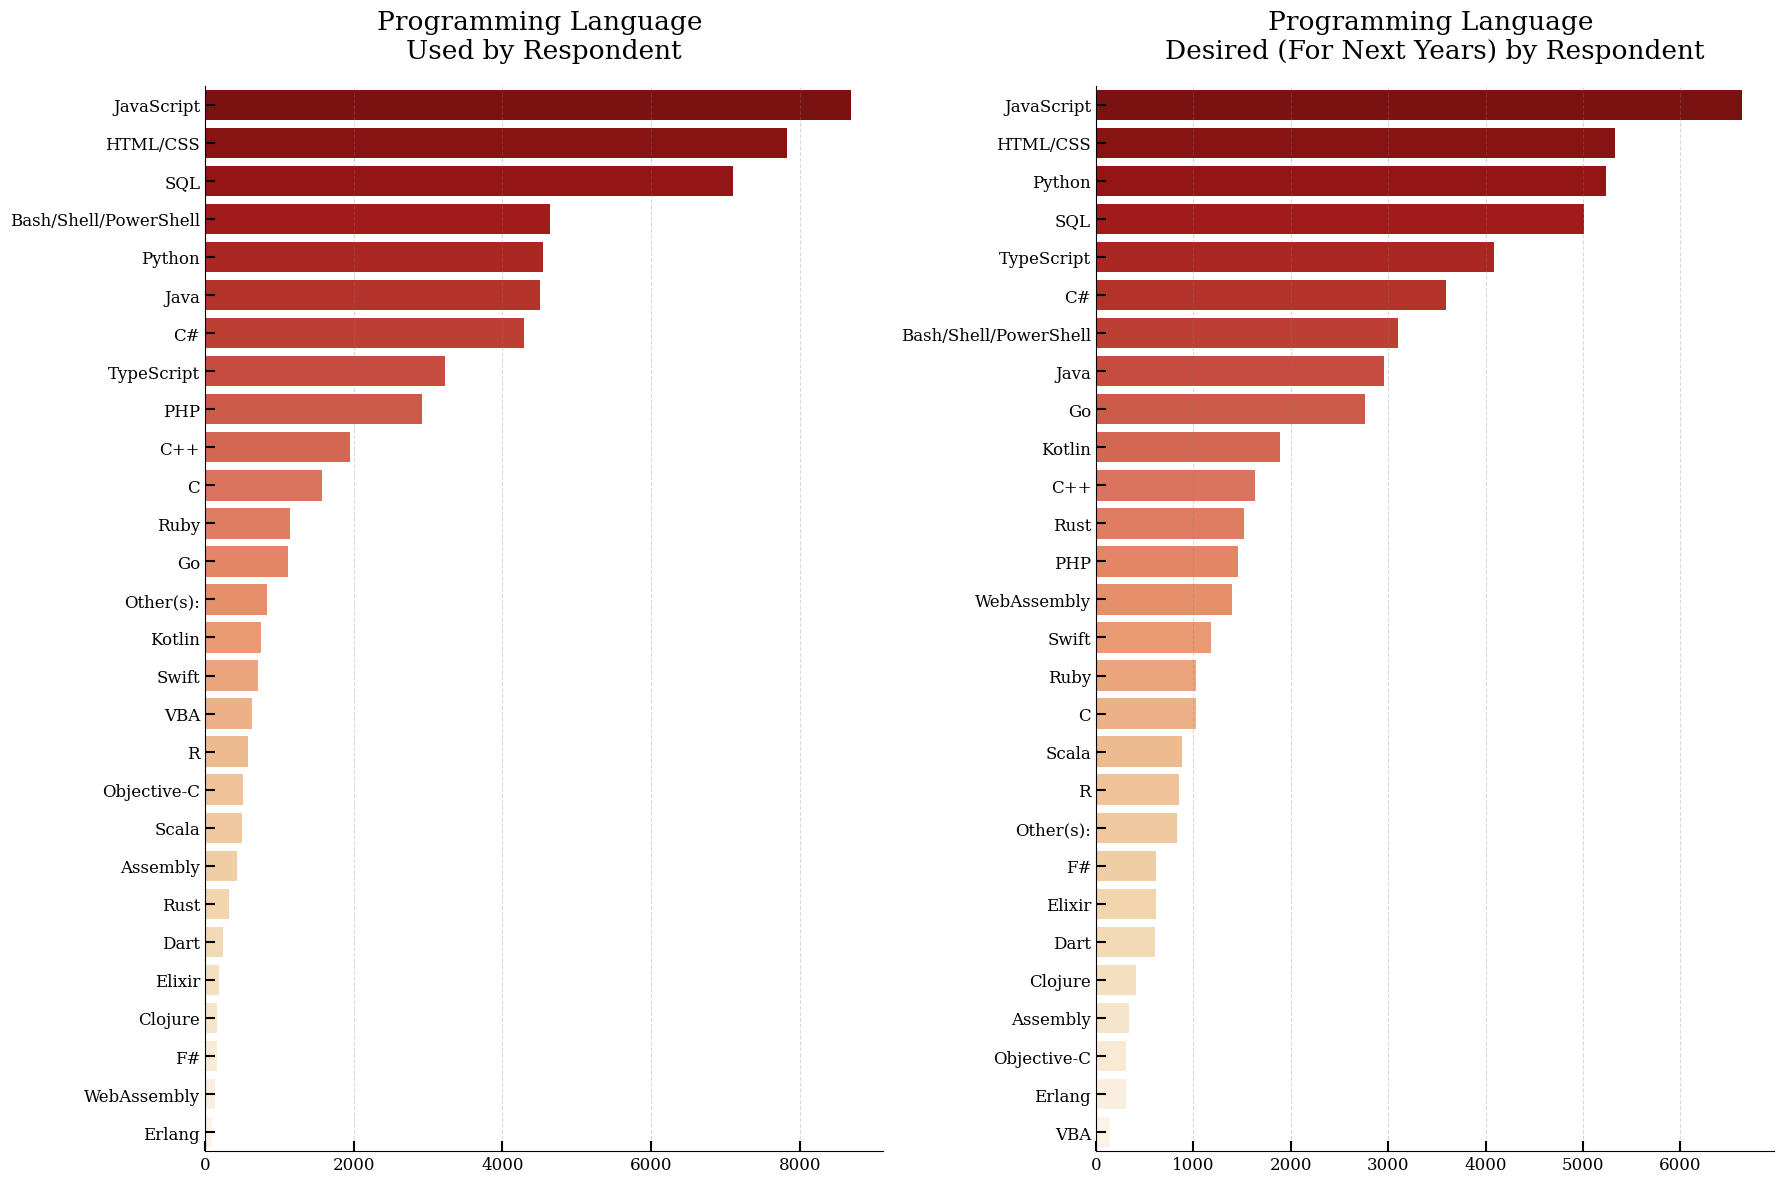

In [15]:
features = ['LanguageWorkedWith', 'LanguageDesireNextYear']
titles = ['Used', 'Desired (For Next Years)']

plt.figure(figsize=(18, 12))
for i in range(0, len(features)):
    ax = plt.subplot(1, 2, i+1)
    sns.countplot(y=features[i], data=df_tech, order=df_tech[features[i]].value_counts().index, palette='OrRd_r')
    #plt.bar_label(ax.containers[0])
    plt.title(f'Programming Language \n{titles[i]} by Respondent', loc = 'center', pad = 20, size = 19) 
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.tight_layout()
    sns.despine()

Top 5 programming languages used by respondents are:

1. `JavaScript`
2. `HTML/CSS`
3. `SQL`
4. `Bash/Shell/PowerShell`
5. `Python`

Meanwhile, the Top 5 programming languages that will be desired in the next few years are:
1. `JavaScript`
2. `HTML/CSS`
3. `Python`
4. `SQL`
5. `TypeScript`

In [16]:
lang_a = df_tech.value_counts('LanguageWorkedWith', sort=False).reset_index().rename(columns={'LanguageWorkedWith':'Language', 0:'WorkedWith'})
lang_b = df_tech.value_counts('LanguageDesireNextYear', sort=False).reset_index().rename(columns={'LanguageDesireNextYear':'Language', 0:'Desired'})
lang = lang_a.merge(lang_b, on='Language')
lang['Growth (%)'] = ((lang['Desired'] - lang['WorkedWith']) / lang['WorkedWith'] * 100).round(2)

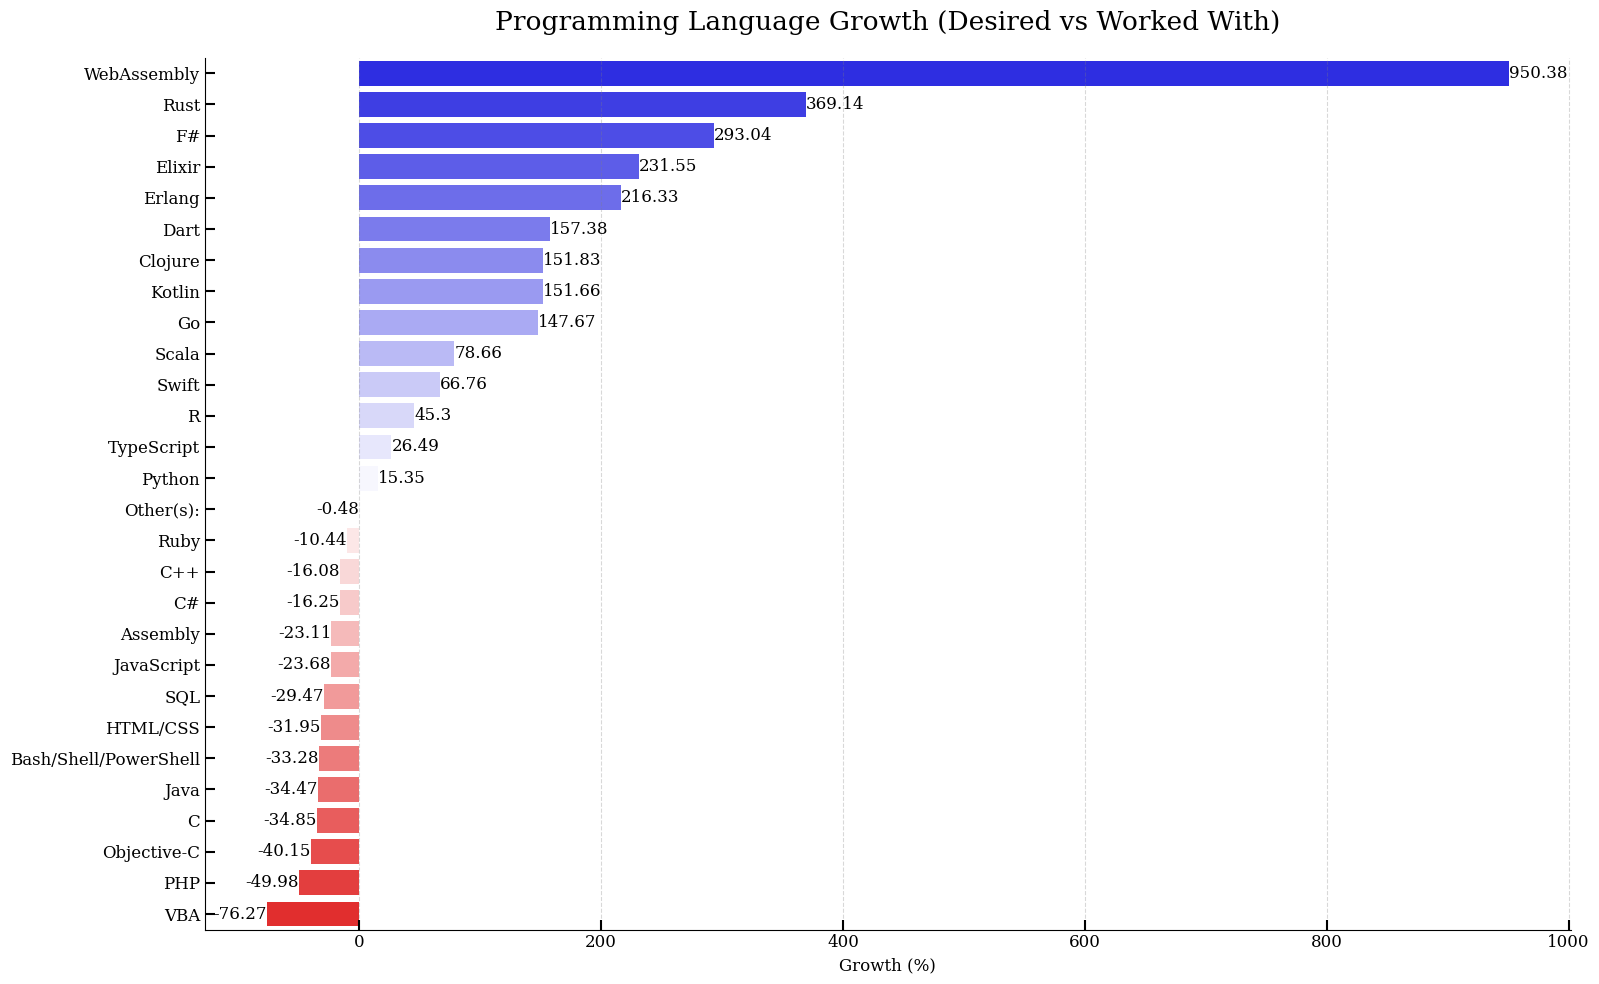

In [17]:
fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(1,2,1)
sns.barplot(x='Growth (%)', y='Language',data=lang, order=lang.sort_values('Growth (%)', ascending=False).loc[:, 'Language'], palette='bwr')
plt.bar_label(ax.containers[0])
ax.set(ylabel=None)
plt.title('Programming Language Growth (Desired vs Worked With)', pad = 20, size = 19)
plt.tight_layout()
sns.despine()

The 5 programming languages with the biggest growth are:
1. `WebAssembly`
2. `Rust`
3. `F#`
4. `Elixir`
5. `Erlang`

Meanwhile, the 5 programming languages with the biggest decline:
1. `VBA`
2. `PHP`
3. `Objective-C`
4. `C`
5. `Java`

**Among the top 5 programming languages currently in use or sought after, `TypeScript` demonstrates the most significant growth at 26.49%, while `Bash/Shell/PowerShell` experiences the most notable decline at -33.28%.**

### 📌 Database

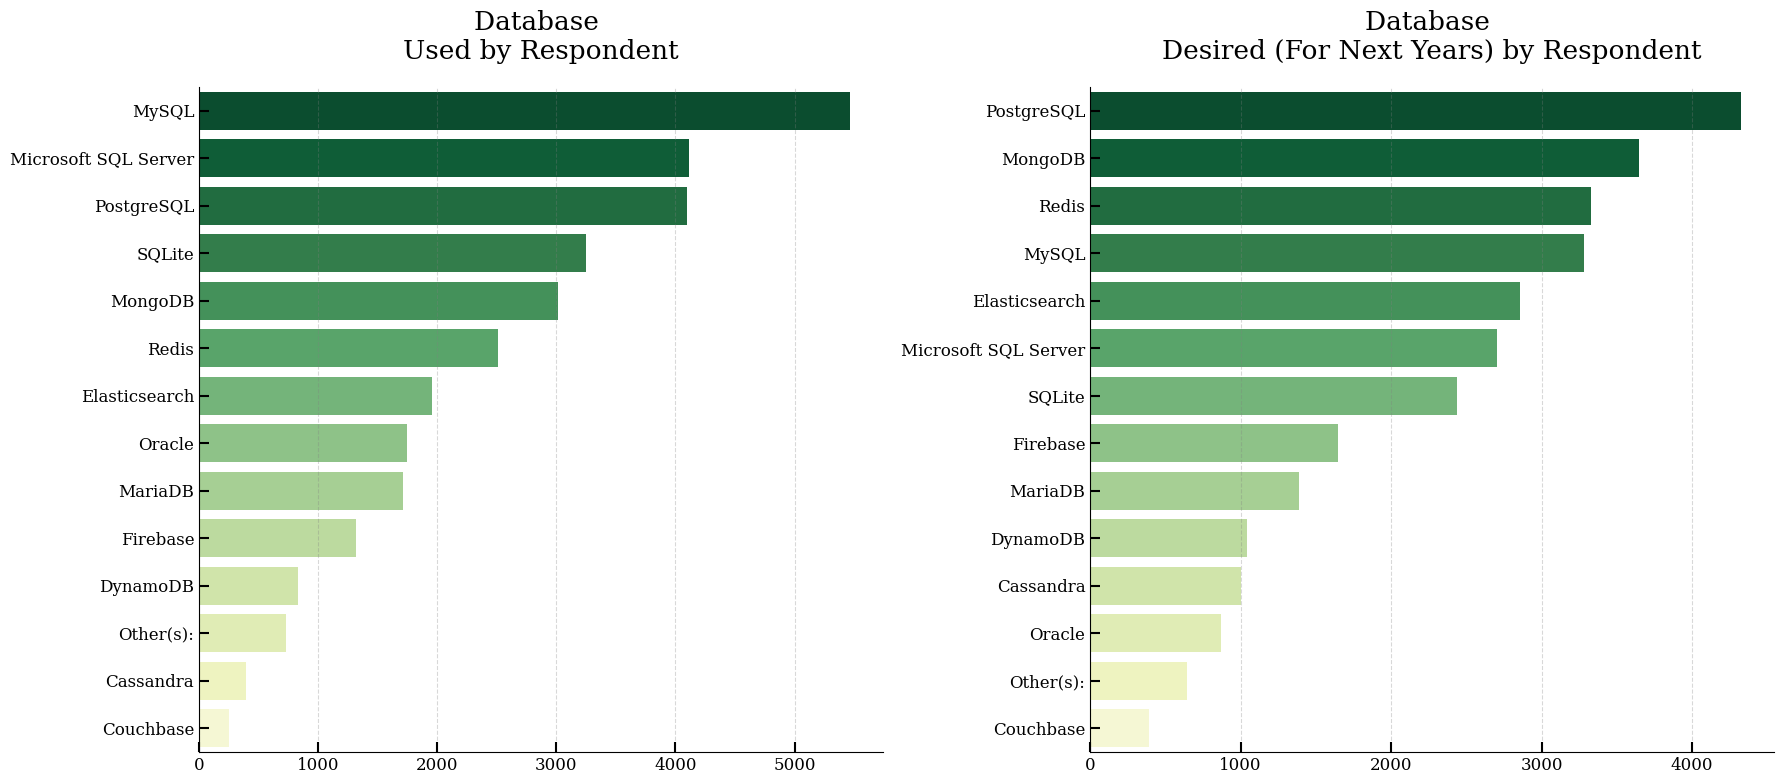

In [18]:
features = ['DatabaseWorkedWith', 'DatabaseDesireNextYear']
titles = ['Used', 'Desired (For Next Years)']

plt.figure(figsize=(18, 8))
for i in range(0, len(features)):
    ax = plt.subplot(1, 2, i+1)
    sns.countplot(y=features[i], data=df_tech, order=df_tech[features[i]].value_counts().index, palette='YlGn_r')
    #plt.bar_label(ax.containers[0])
    plt.title(f'Database \n{titles[i]} by Respondent', loc = 'center', pad = 20, size = 19) 
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.tight_layout()
    sns.despine()

Top 5 databases used by respondents are:

1. `MySQL`
2. `Microsoft SQL Server`
3. `PostgreSQL`
4. `SQLite`
5. `MongoDB`

Meanwhile, the Top 5 databases that will be desired in the next few years are:
1. `PostgreSQL`
2. `MongoDB`
3. `Redis`
4. `MySQL`
5. `Elasticsearch`

In [19]:
db_a = df_tech.value_counts('DatabaseWorkedWith', sort=False).reset_index().rename(columns={'DatabaseWorkedWith':'DB', 0:'WorkedWith'})
db_b = df_tech.value_counts('DatabaseDesireNextYear', sort=False).reset_index().rename(columns={'DatabaseDesireNextYear':'DB', 0:'Desired'})
db = db_a.merge(db_b, on='DB')
db['Growth (%)'] = ((db['Desired'] - db['WorkedWith']) / db['WorkedWith'] * 100).round(2)

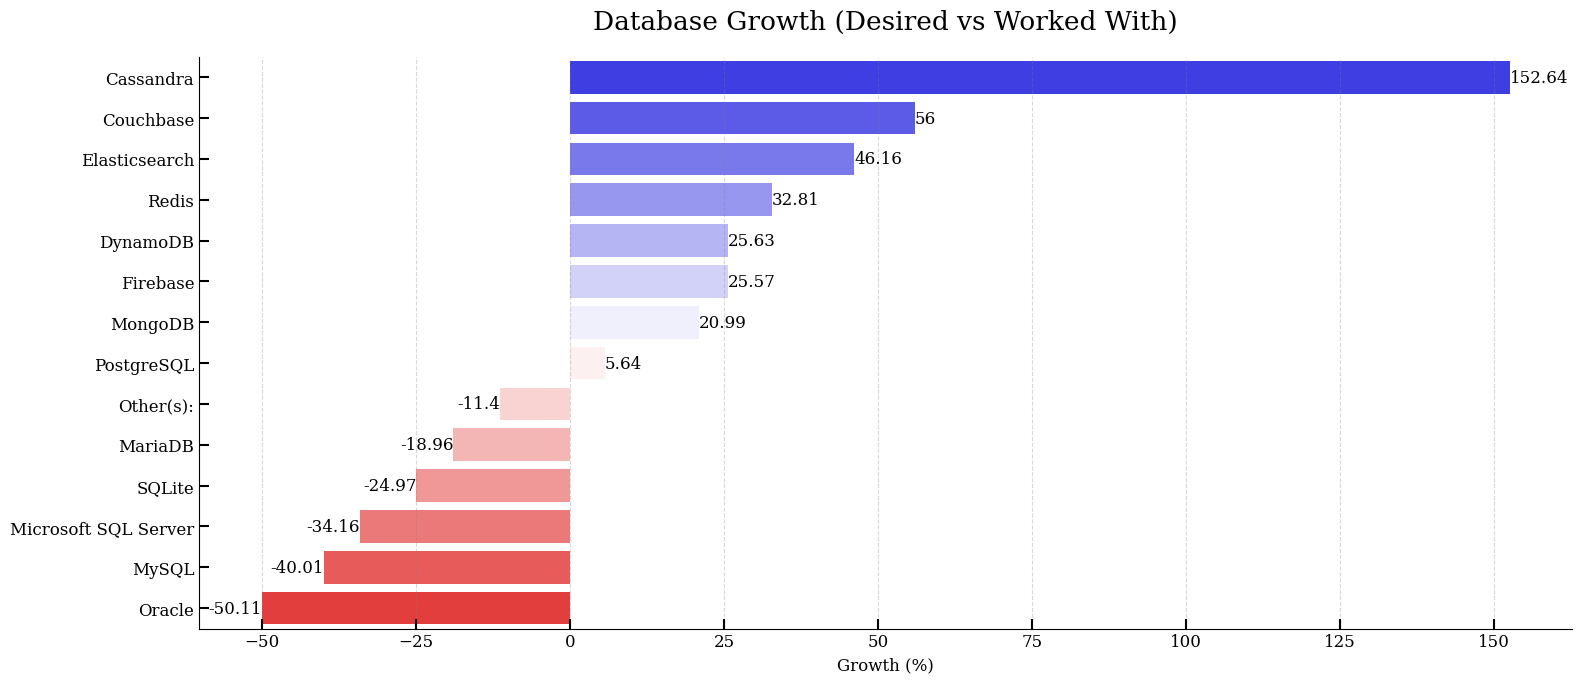

In [20]:
fig = plt.figure(figsize=(30,7))

ax = fig.add_subplot(1,2,1)
sns.barplot(x='Growth (%)', y='DB',data=db, order=db.sort_values('Growth (%)', ascending=False).loc[:, 'DB'], palette='bwr')
plt.bar_label(ax.containers[0])
plt.title('Database Growth (Desired vs Worked With)', pad = 20, size = 19)
ax.set(ylabel=None)
plt.tight_layout()
sns.despine()

The 5 databases with the biggest growth are:
1. `Cassandra`
2. `Couchbase`
3. `Elasticsearch`
4. `Redis`
5. `DynamoDB`

Meanwhile, the 5 databases with the biggest decline:
1. `Oracle`
2. `MySQL`
3. `Microsoft SQL Server`
4. `SQLite`
5. `MariaDB`

**Among the top 5 databases presently in use or sought after, 'Elasticsearch' exhibits the most substantial growth at 46.16%, whereas 'MySQL' experiences the most considerable decline at -40.01%.**

### 📌 Platform

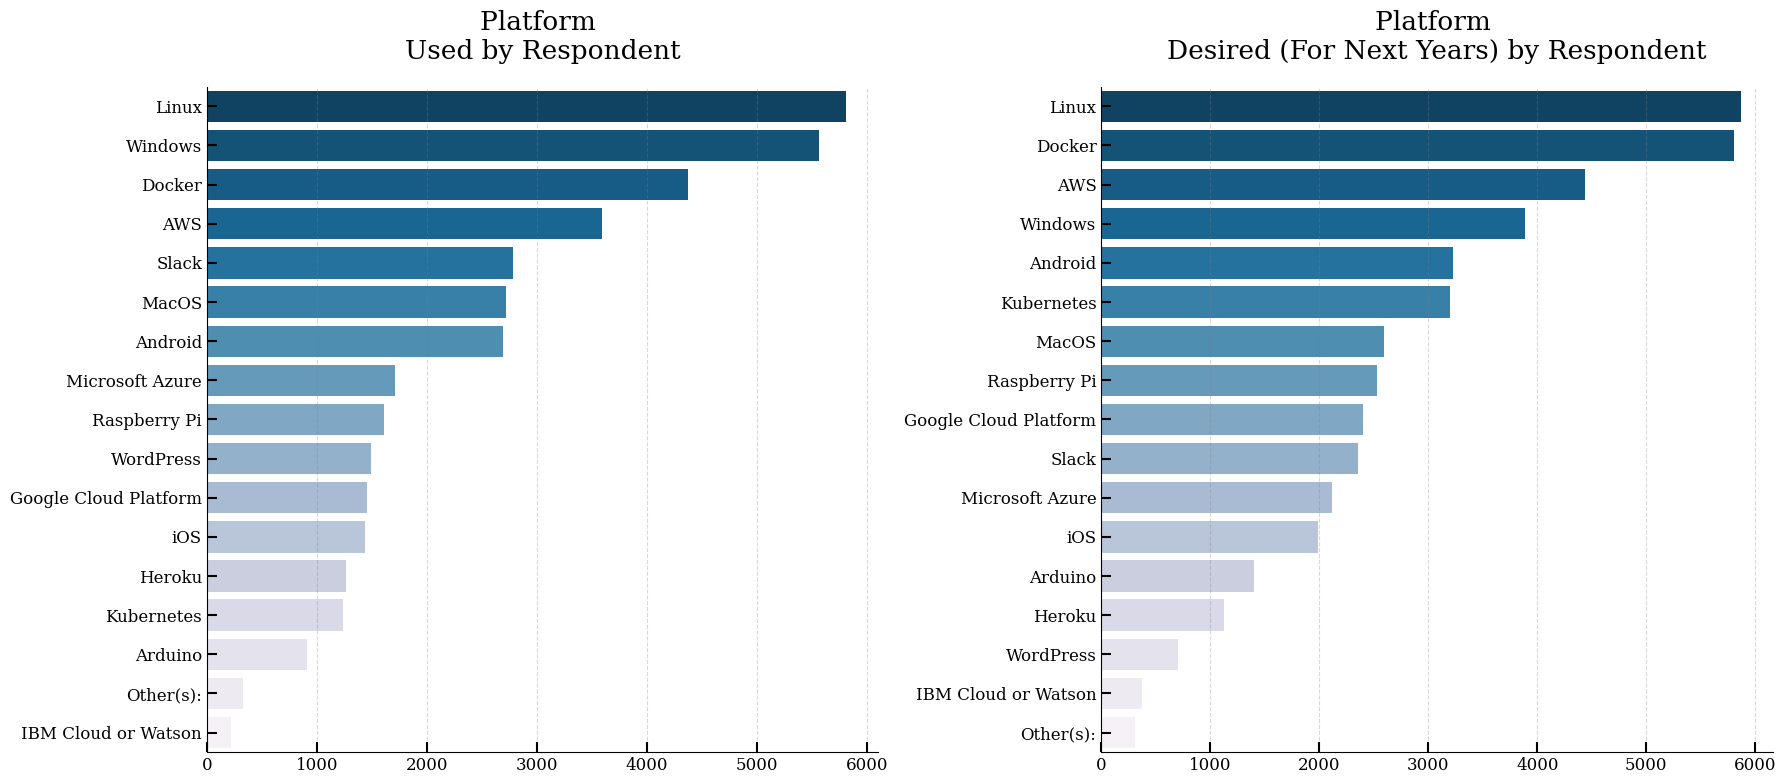

In [21]:
features = ['PlatformWorkedWith', 'PlatformDesireNextYear']
titles = ['Used', 'Desired (For Next Years)']

plt.figure(figsize=(18, 8))
for i in range(0, len(features)):
    ax = plt.subplot(1, 2, i+1)
    sns.countplot(y=features[i], data=df_tech, order=df_tech[features[i]].value_counts().index, palette='PuBu_r')
    #plt.bar_label(ax.containers[0])
    plt.title(f'Platform \n{titles[i]} by Respondent', loc = 'center', pad = 20, size = 19) 
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.tight_layout()
    sns.despine()

The top 5 platforms used by respondents are:

1. `Linux`
2. `Windows`
3. `Docker`
4. `AWS`
5. `Slack`

Meanwhile, the Top 5 platforms that will be desired in the next few years are:
1. `Linux`
2. `Docker`
3. `AWS`
4. `Windows`
5. `Android`

In [22]:
plat_a = df_tech.value_counts('PlatformWorkedWith', sort=False).reset_index().rename(columns={'PlatformWorkedWith':'Platform', 0:'WorkedWith'})
plat_b = df_tech.value_counts('PlatformDesireNextYear', sort=False).reset_index().rename(columns={'PlatformDesireNextYear':'Platform', 0:'Desired'})
plat = plat_a.merge(plat_b, on='Platform')
plat['Growth (%)'] = ((plat['Desired'] - plat['WorkedWith']) / plat['WorkedWith'] * 100).round(2)

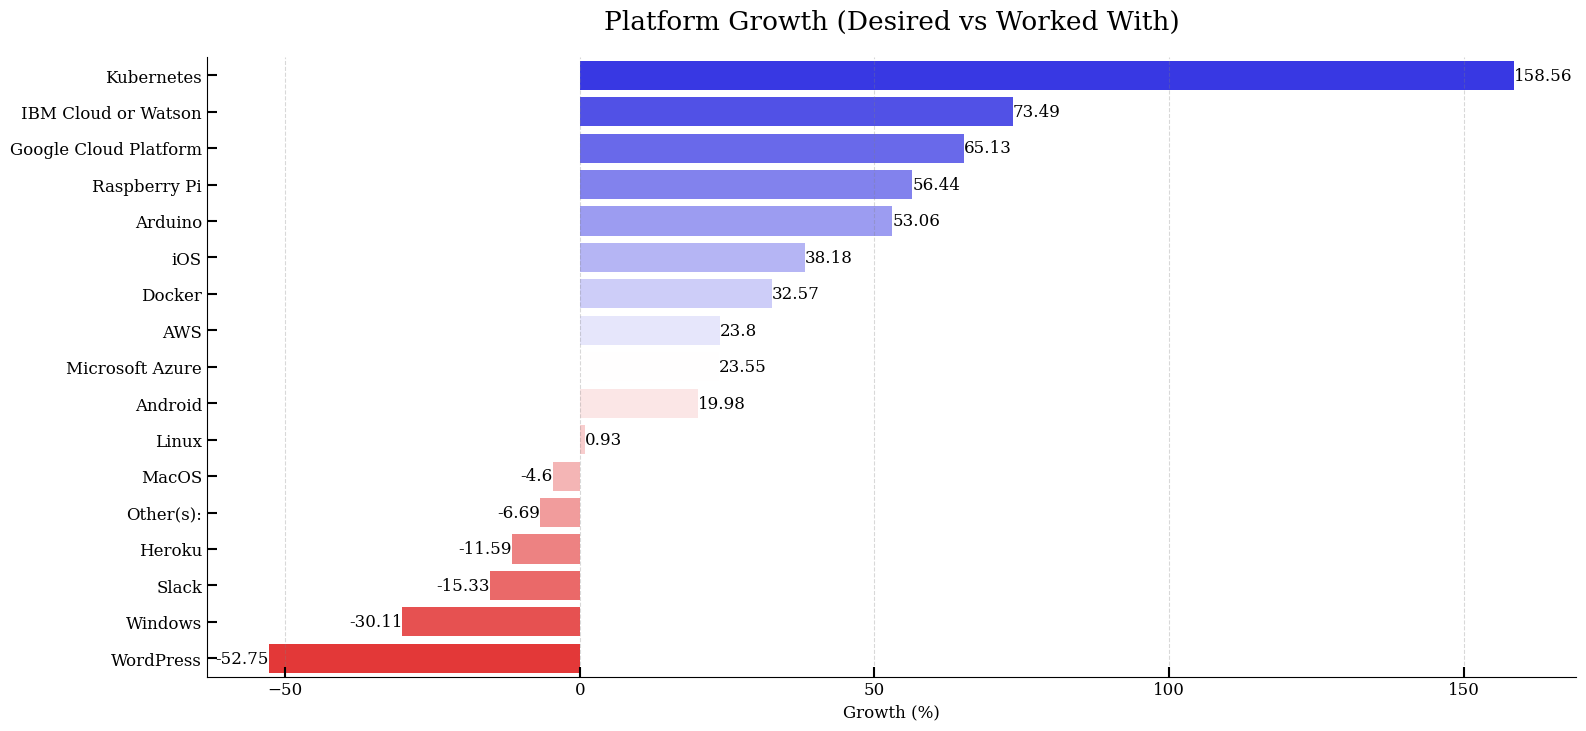

In [23]:
fig = plt.figure(figsize=(30,7))

ax = fig.add_subplot(1,2,1)
sns.barplot(x='Growth (%)', y='Platform',data=plat, order=plat.sort_values('Growth (%)', ascending=False).loc[:, 'Platform'], palette='bwr')
plt.bar_label(ax.containers[0])
ax.set(ylabel=None)
plt.tight_layout()
plt.title('Platform Growth (Desired vs Worked With)', pad = 20, size = 19)
sns.despine()

The 5 platforms with the biggest growth are:
1. `Kubernetes`
2. `IBM Cloud or Watson`
3. `Google Cloud Platform`
4. `Raspberry Pi`
5. `Arduino`

Meanwhile, the 5 platforms with the biggest decline:
1. `WordPress`
2. `Windows`
3. `Slack`
4. `Heroku`
5. `MacOS`

**Among the top 5 platforms currently utilized or aspired to, `Docker` demonstrates the most significant growth at 32.57%, whereas `Windows` experiences the most notable decline at -30.11%.**

### 📌 Web Frame

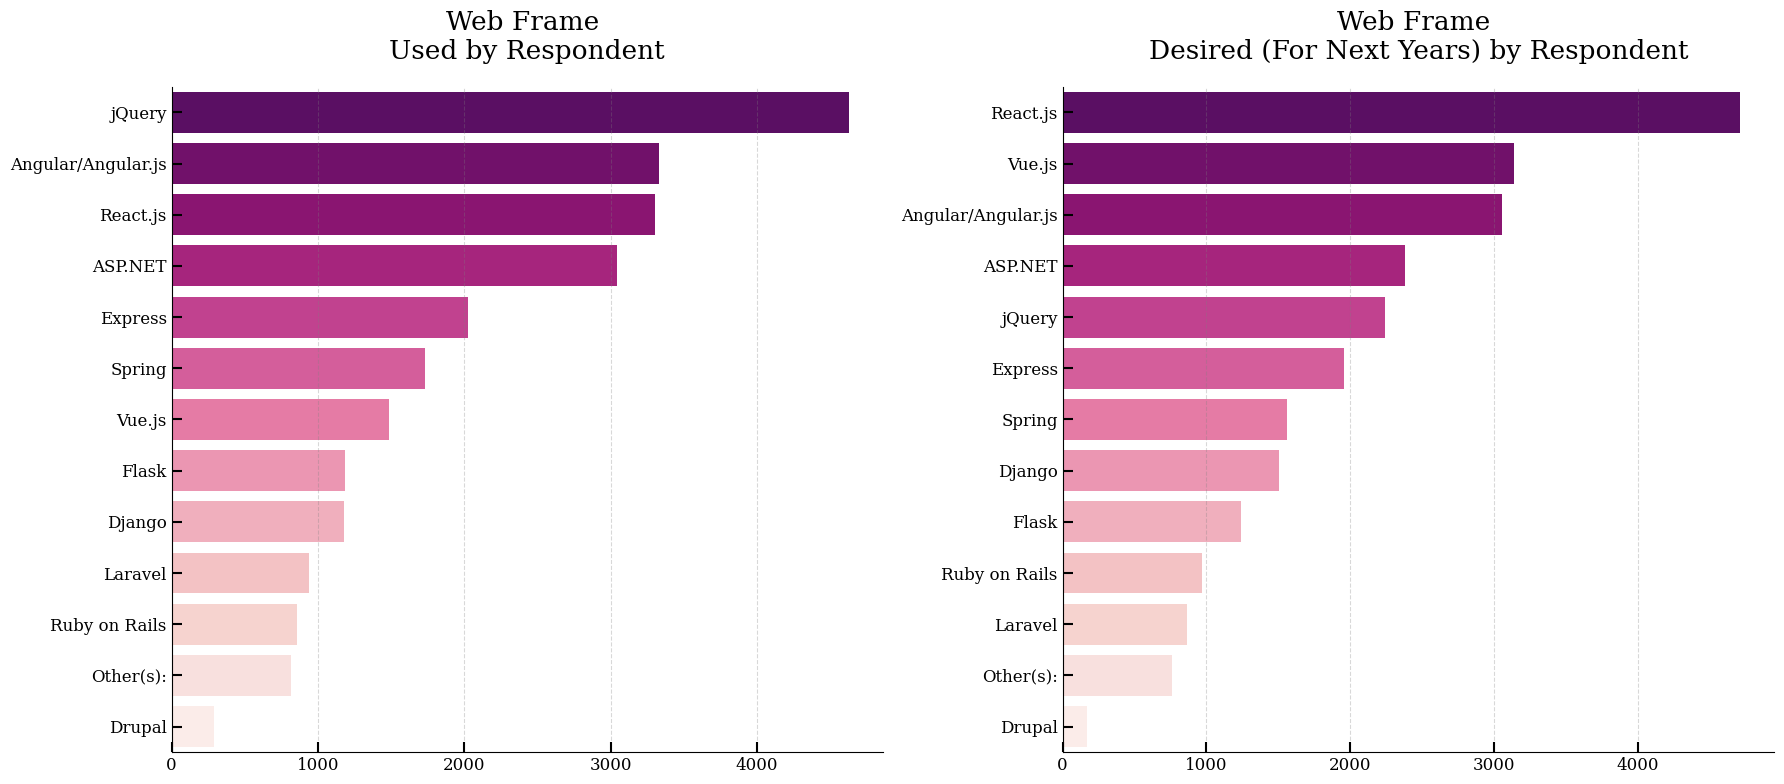

In [24]:
features = ['WebFrameWorkedWith', 'WebFrameDesireNextYear']
titles = ['Used', 'Desired (For Next Years)']

plt.figure(figsize=(18, 8))
for i in range(0, len(features)):
    ax = plt.subplot(1, 2, i+1)
    sns.countplot(y=features[i], data=df_tech, order=df_tech[features[i]].value_counts().index, palette='RdPu_r')
    #plt.bar_label(ax.containers[0])
    plt.title(f'Web Frame \n{titles[i]} by Respondent', loc = 'center', pad = 20, size = 19) 
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    plt.tight_layout()
    sns.despine()

Top 5 web frames used by respondents are:

1. `jQuery`
2. `Angular/Angular.js`
3. `React.js`
4. `ASP.NET`
5. `Express`

Meanwhile, the Top 5 web frames that will be desired in the next few years are:
1. `React.js`
2. `Vue.js`
3. `Angular/Angular.js`
4. `ASP.NET`
5. `jQuery`

In [25]:
WebFrame_a = df_tech.value_counts('WebFrameWorkedWith', sort=False).reset_index().rename(columns={'WebFrameWorkedWith':'WebFrame', 0:'WorkedWith'})
WebFrame_b = df_tech.value_counts('WebFrameDesireNextYear', sort=False).reset_index().rename(columns={'WebFrameDesireNextYear':'WebFrame', 0:'Desired'})
WebFrame = WebFrame_a.merge(WebFrame_b, on='WebFrame')
WebFrame['Growth (%)'] = ((WebFrame['Desired'] - WebFrame['WorkedWith']) / WebFrame['WorkedWith'] * 100).round(2)

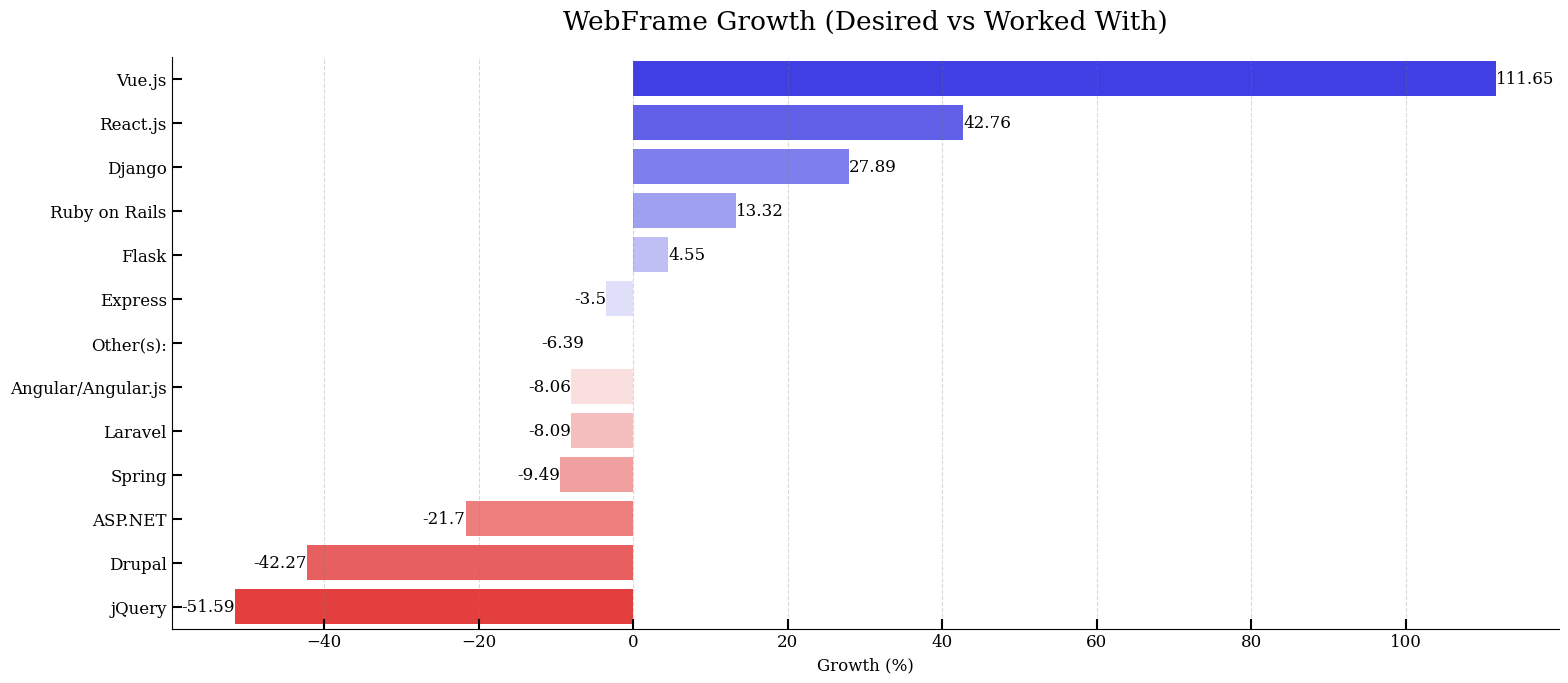

In [26]:
fig = plt.figure(figsize=(30,7))

ax = fig.add_subplot(1,2,1)
sns.barplot(x='Growth (%)', y='WebFrame',data=WebFrame, order=WebFrame.sort_values('Growth (%)', ascending=False).loc[:, 'WebFrame'], palette='bwr')
plt.bar_label(ax.containers[0])
plt.title('WebFrame Growth (Desired vs Worked With)', pad=20, size=19)
ax.set(ylabel=None)
plt.tight_layout()
sns.despine()

The 5 web frames with the biggest growth are:
1. `Vue.js`
2. `React.js`
3. `Django`
4. `Ruby on Rails`
5. `Flask`

Meanwhile, 5 web frames with the biggest decline:
1. `jQuery`
2. `Drupal`
3. `ASP.NET`
4. `Spring`
5. `Laravel`

**Among the top 5 web frameworks currently utilized or sought after, `Vue.js` exhibits the most substantial growth at 111.65%, whereas `jQuery` experiences the most significant decline at -51.59%.**

### 📌 IDE

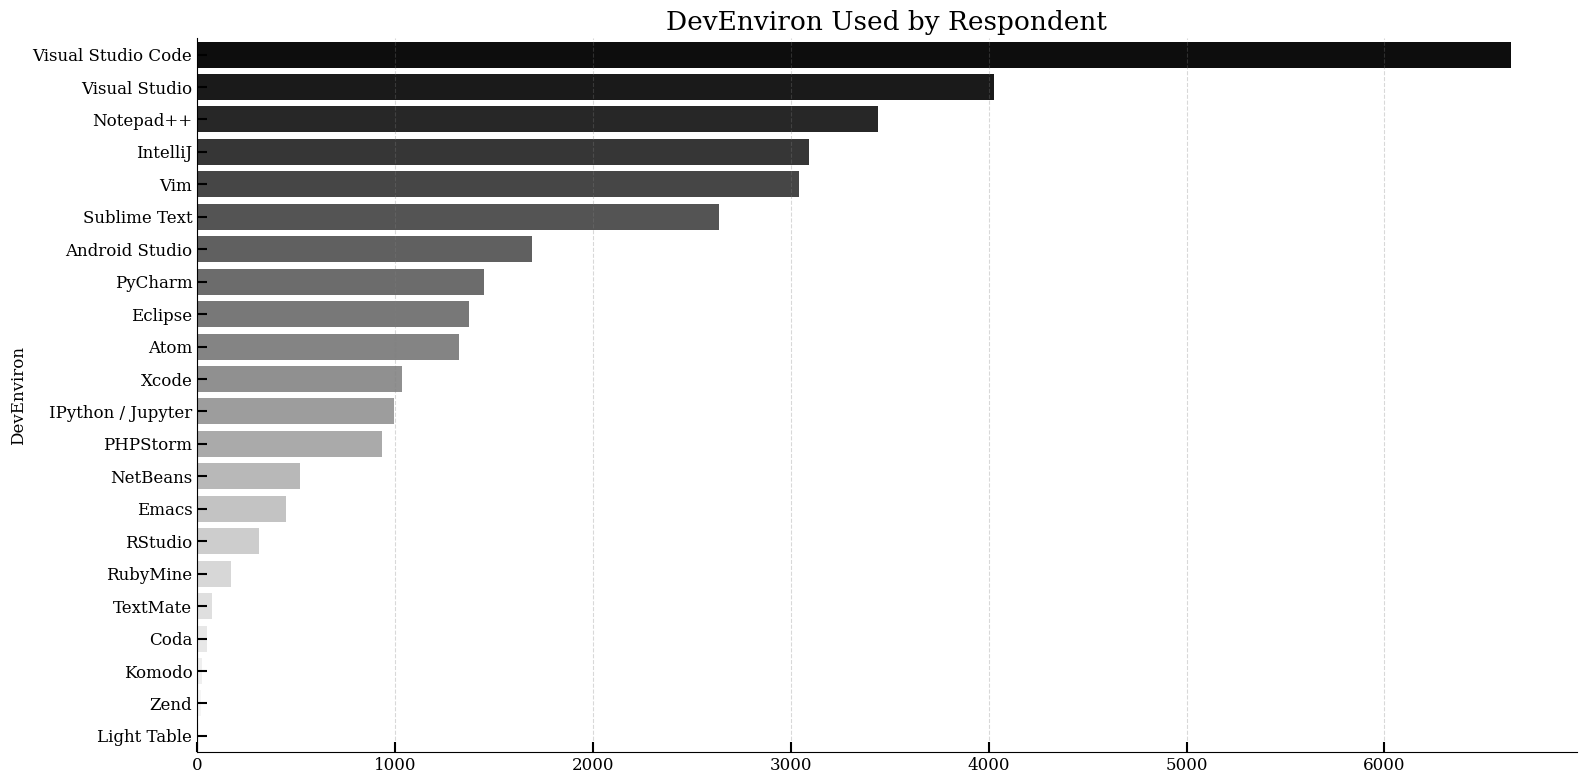

In [27]:
fig = plt.figure(figsize=(30,8))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='DevEnviron',data=df_tech, order=df_tech['DevEnviron'].value_counts().index, palette='Greys_r')
#plt.bar_label(ax.containers[0])
plt.title('DevEnviron Used by Respondent', size=19)
ax.set(xlabel=None)
plt.tight_layout()
sns.despine()

Top 5 IDE used by respondents are:

1. `Visual Studio Code`
2. `Visual Studio`
3. `Notepad++`
4. `IntelliJ`
5. `Vim`

## 2. Demographic Dataset

In [28]:
df_demo.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Complete a take-home project;I

### 📌 Respondent Description

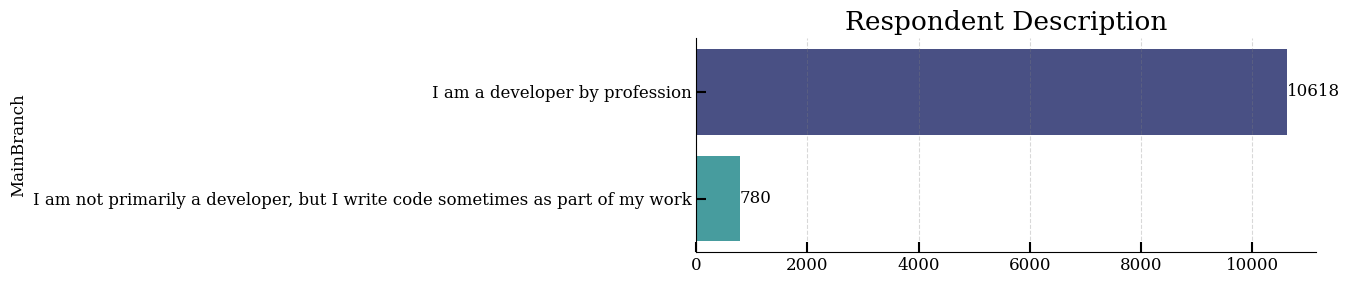

In [29]:
fig = plt.figure(figsize=(20,3))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='MainBranch',data=df_demo, order=df_demo['MainBranch'].value_counts().index, palette='mako')
plt.bar_label(ax.containers[0])
plt.title('Respondent Description', size=19)
ax.set(xlabel=None)
plt.tight_layout()
sns.despine()

The majority of respondents who took this survey described themselves as a developer as a profession.

### 📌 Age

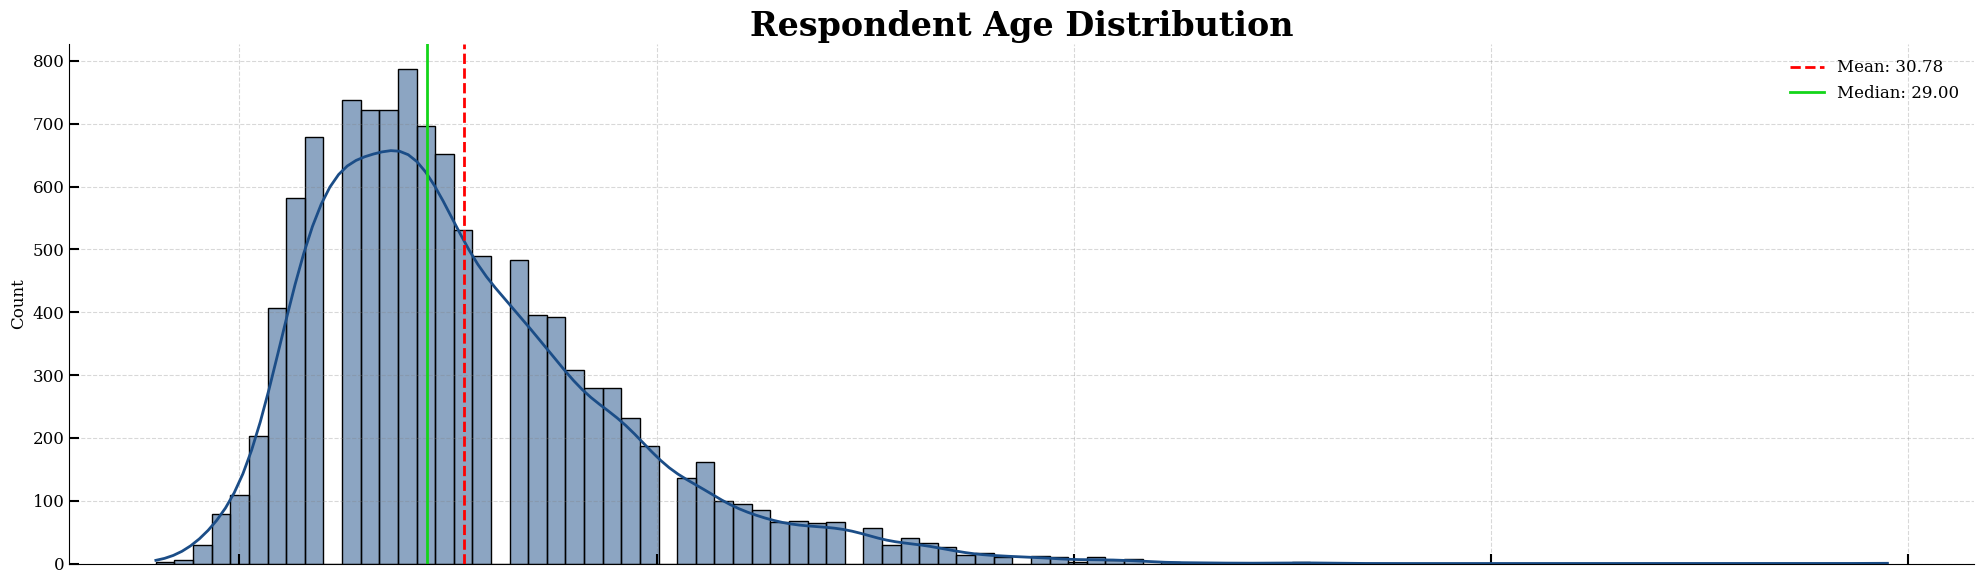

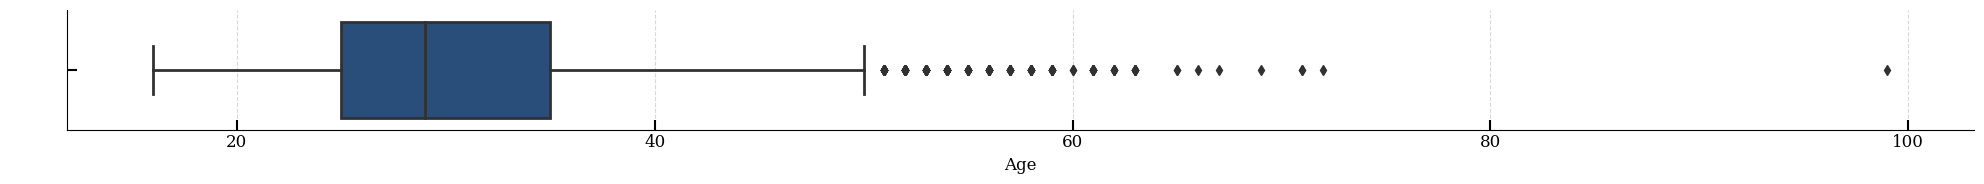

In [30]:
fig = plt.figure(figsize=(20,6))
sns.histplot(x='Age', data=df_demo, kde=True, color='#1B4D87')
plt.axvline(df_demo['Age'].mean(), color='red', linestyle='--', label='Mean: {:.2f}'.format(df_demo['Age'].mean()))
plt.axvline(df_demo['Age'].median(), color='#13D519', linestyle='-', label='Median: {:.2f}'.format(df_demo['Age'].median()))
plt.legend()
plt.title('Respondent Age Distribution', size=24, weight='bold')
plt.xlabel(None)
plt.gca().set_xticklabels([])
plt.tight_layout()

fig = plt.figure(figsize=(20,2))
sns.boxplot(x='Age',data=df_demo, color='#1B4D87')
plt.ylabel(' ', labelpad=25)
plt.tight_layout()
sns.despine()

In [31]:
df_demo['Age'].quantile([.25, .75]).to_frame().reset_index().rename(columns={'index':'Percentile'})

,Percentile,Age
0,0.25,25.0
1,0.75,35.0


The majority of respondents who took part in this survey were in the range of 25-35 years.

### 📌 Gender

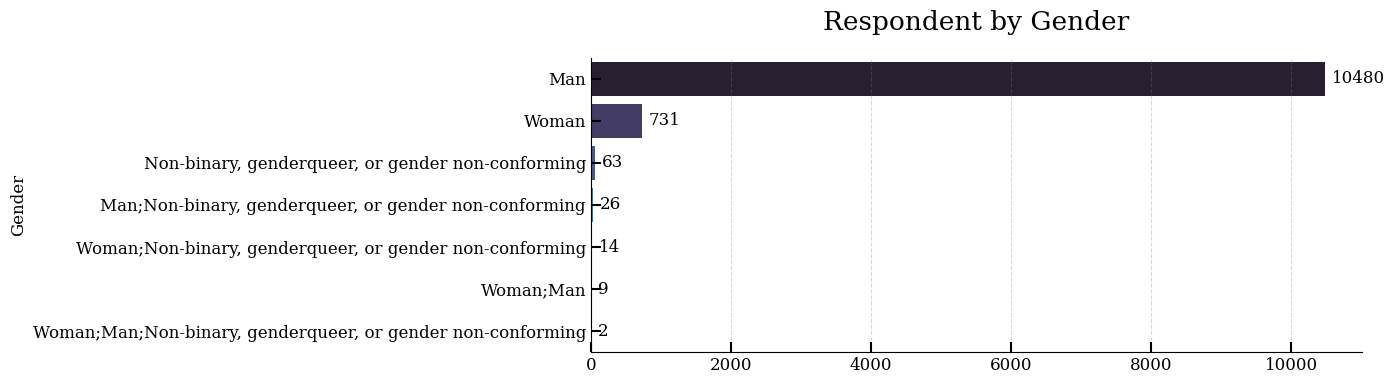

In [32]:
fig = plt.figure(figsize=(22,4))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='Gender',data=df_demo, order=df_demo['Gender'].value_counts().index, palette='mako')
plt.bar_label(ax.containers[0], padding=5)
ax.set(xlabel=None)
plt.title('Respondent by Gender', pad=20, size=19)
plt.tight_layout()
sns.despine()

In the developer profession, the male gender still dominates compared to other genders.

### 📌 Country

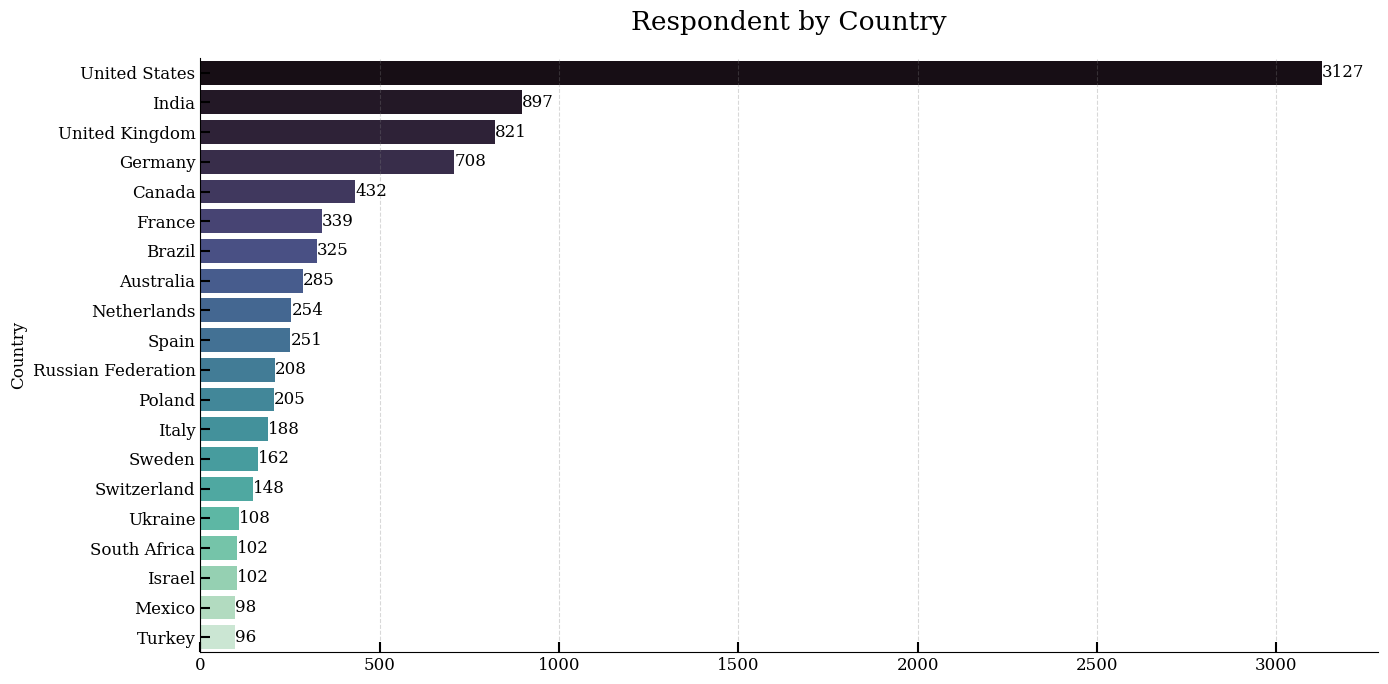

In [33]:
fig = plt.figure(figsize=(26,7))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='Country',data=df_demo, order=df_demo['Country'].value_counts().head(20).index, palette='mako')
plt.bar_label(ax.containers[0])
ax.set(xlabel=None)
plt.title('Respondent by Country', pad=20, size=19)
plt.tight_layout()
sns.despine()

The graph above contains the 20 countries with the highest number of respondents in this survey. Most respondents came from the United States. Furthermore, most of the other respondents came from India, UK, Germany, and Canada.

### 📌 Formal Education Level

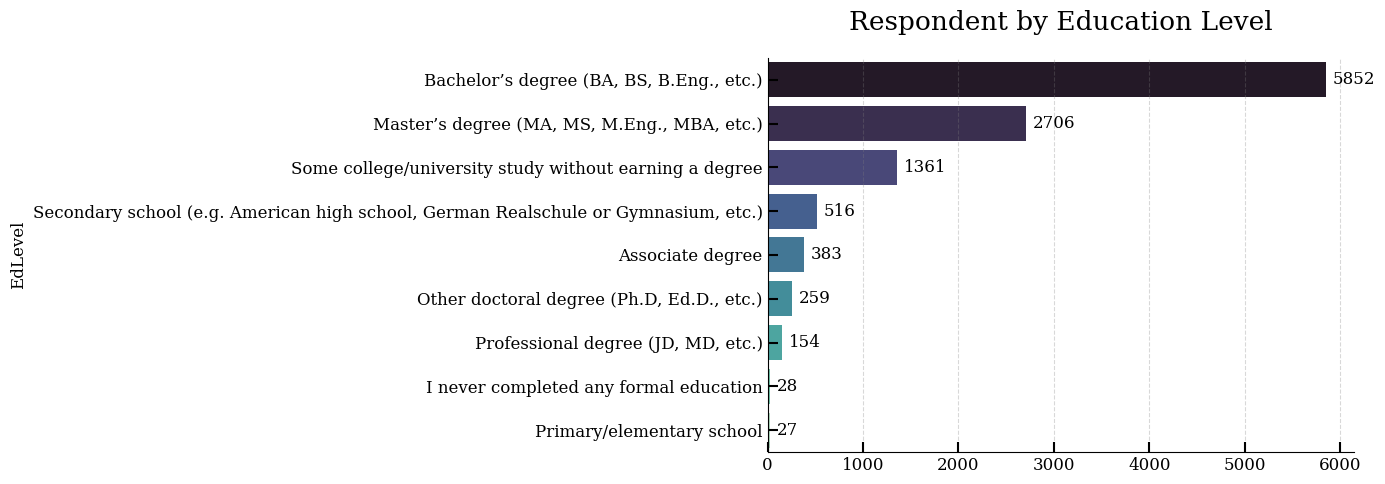

In [34]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='EdLevel',data=df_demo, order=df_demo['EdLevel'].value_counts().index, palette='mako')
plt.bar_label(ax.containers[0], padding=5)
ax.set(xlabel=None)
plt.title('Respondent by Education Level', pad=20, size=19)
plt.tight_layout()
sns.despine()

The majority of the last education level of the respondents in this survey is Bachelor Degree. After that there is a Master Degree and some college/university study (without degree).

### 📌 Undergrad Major / Field of Study

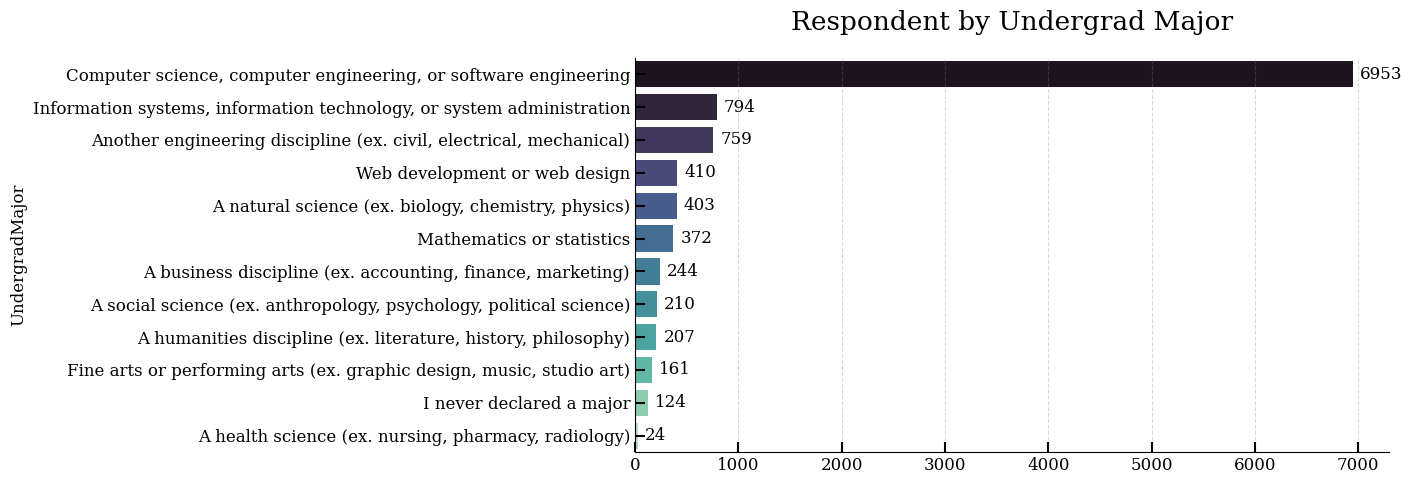

In [35]:
fig = plt.figure(figsize=(22,5))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='UndergradMajor',data=df_demo, order=df_demo['UndergradMajor'].value_counts().index, palette='mako')
plt.bar_label(ax.containers[0], padding=5)
ax.set(xlabel=None)
plt.title('Respondent by Undergrad Major', pad=20, size=19)
plt.tight_layout()
sns.despine()

The majority of the majors taken by respondents who work as developers are **computer science, computer engineering, or software engineering**. Other majors taken by the developers in this survey are **information systems, information technology, or system administration**; **another engineering discipline (ex. civil, electrical, mechanical);** and **web development or web design**. Almost all majors taken by respondents with the developer profession are majors in the IT field.

### 📌 Non-degree Education

There are several respondents who took more than one non-degree education, and therefore the `explode` function will be used to find out the distribution for each of these non-degree education

In [36]:
df_nondeg = df_demo[['Respondent', 'EduOther']]
for i in range(df_nondeg.shape[0]):
    try:
        df_nondeg['EduOther'][i] = df_nondeg['EduOther'][i].split(';')
    except:
        pass
df_nondeg = df_nondeg.explode('EduOther', ignore_index=True)

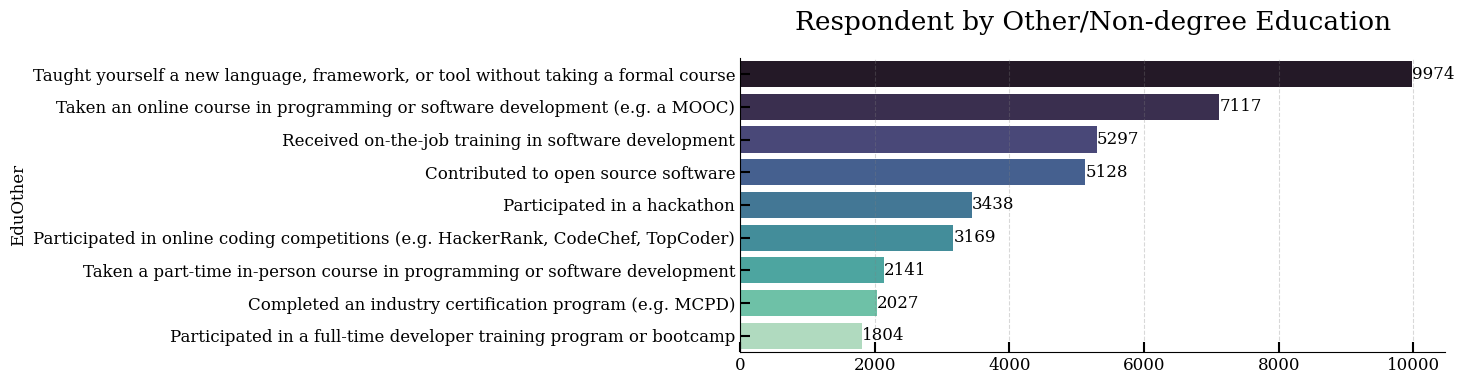

In [37]:
fig = plt.figure(figsize=(22,4))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='EduOther',data=df_nondeg, order=df_nondeg['EduOther'].value_counts().index, palette='mako')
plt.bar_label(ax.containers[0])
ax.set(xlabel=None)
plt.title('Respondent by Other/Non-degree Education', pad=20, size=19)
plt.tight_layout()
sns.despine()

In addition to formal education, various activities/other education (non-degree) can also be used to gain knowledge, experience, and even get a profession as a developer. The non-formal activities/education most used by respondents are **self-taught, online courses, and on-the-job training.**

### 📌 Developer Type / Job Title

In [38]:
df_job = df_demo[['Respondent', 'DevType']]
for i in range(df_job.shape[0]):
    try:
        df_job['DevType'][i] = df_job['DevType'][i].split(';')
    except:
        pass
df_job = df_job.explode('DevType', ignore_index=True)

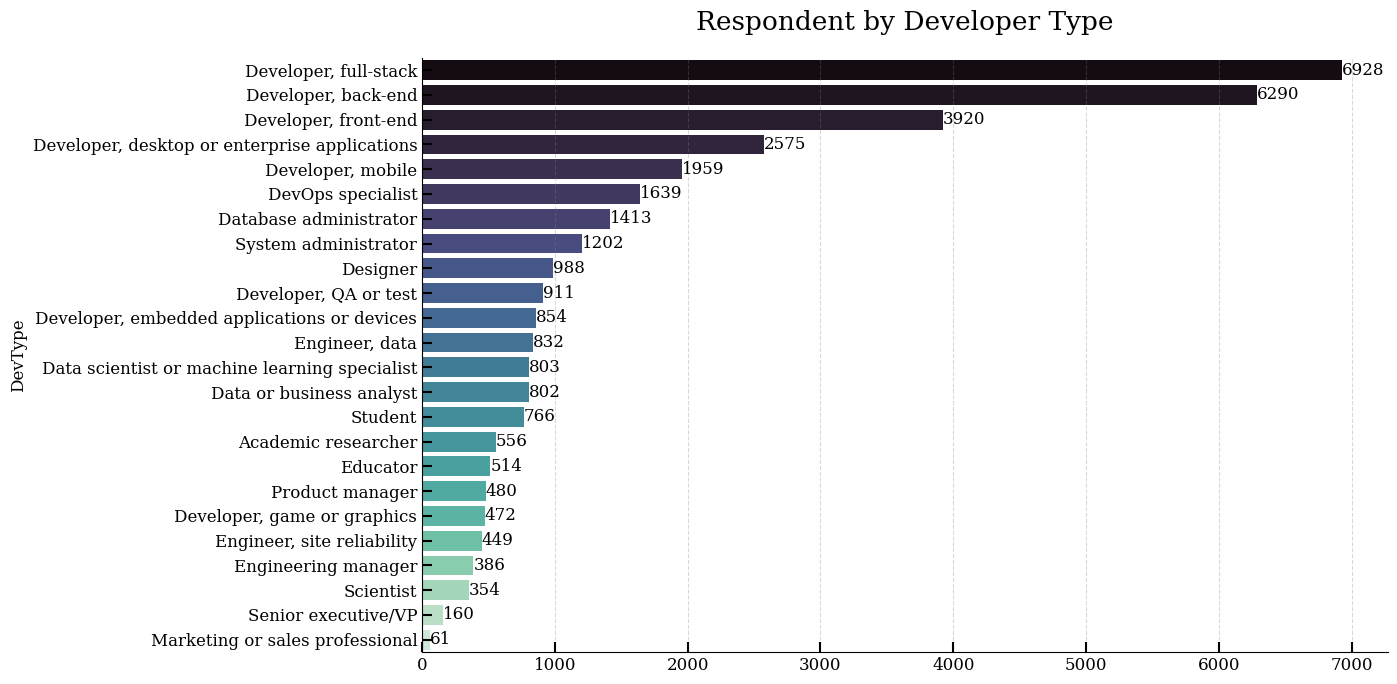

In [39]:
fig = plt.figure(figsize=(24,7))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='DevType',data=df_job, order=df_job['DevType'].value_counts().index, palette='mako')
plt.bar_label(ax.containers[0])
ax.set(xlabel=None)
plt.title('Respondent by Developer Type', pad=20, size=19)
plt.tight_layout()
sns.despine()

The majority of respondents in this survey have positions as full-stack developer, back-end developer, front-end developer, desktop developer, and mobile developer. **Of all respondents, there are 802 people who work as data/business analysts.**

### 📌 Annual Salary

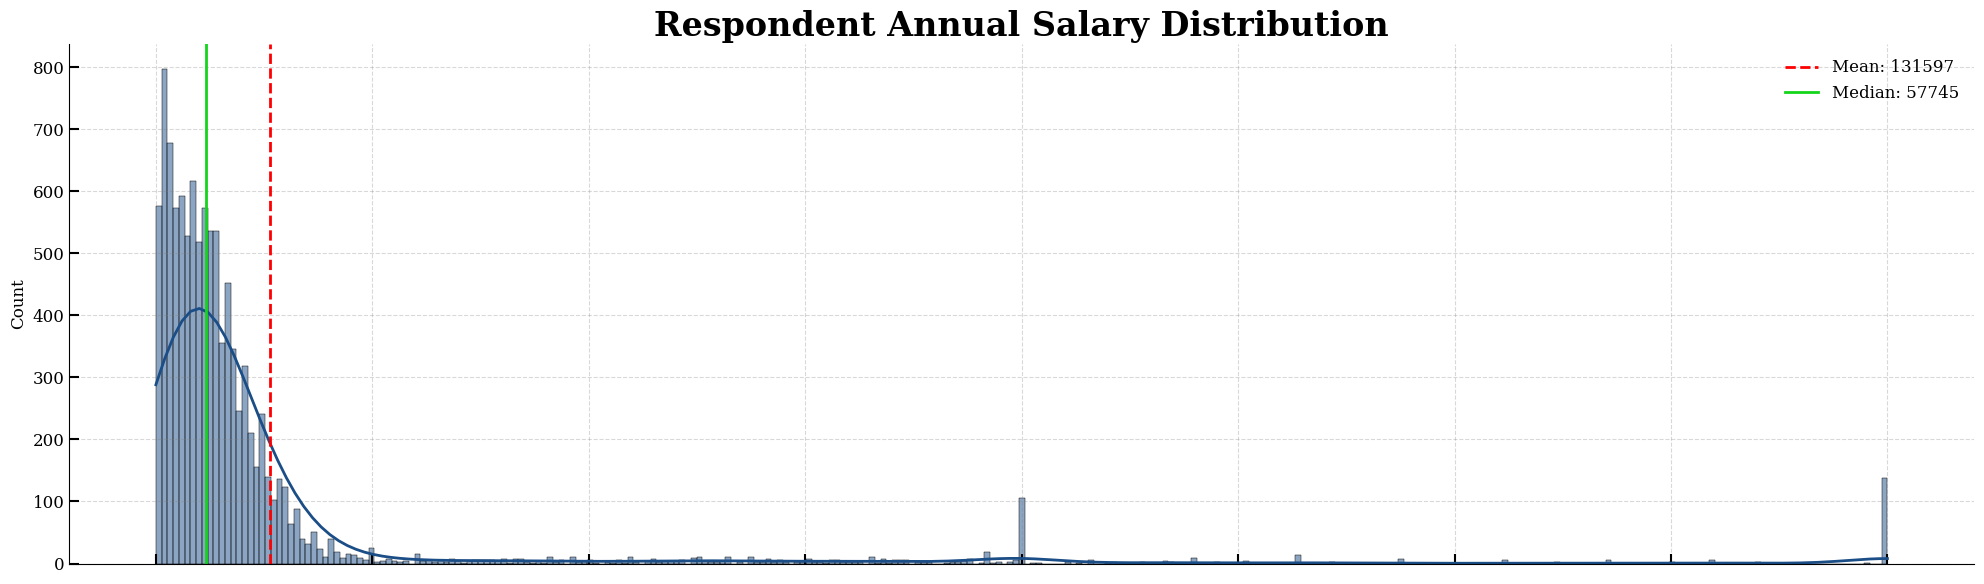

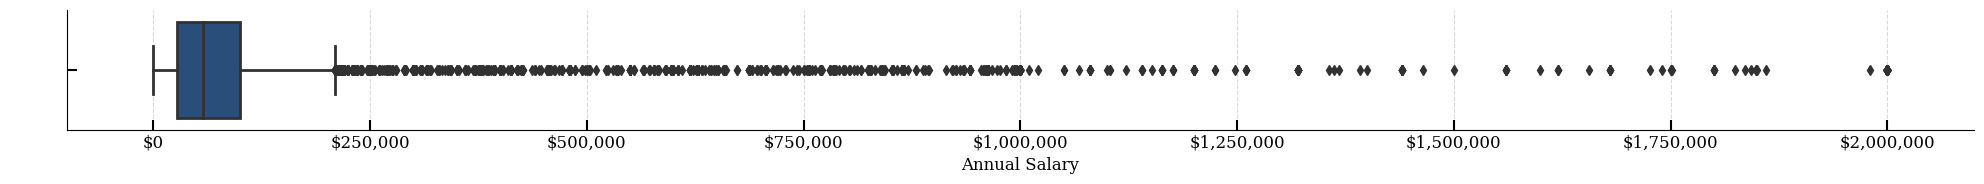

In [40]:
fmt = '${x:,.0f}'
tick = matplotlib.ticker.StrMethodFormatter(fmt)

fig = plt.figure(figsize=(20,6))
sns.histplot(x='ConvertedComp', data=df_demo, kde=True, color='#1B4D87')
plt.axvline(df_demo['ConvertedComp'].mean(), color='red', linestyle='--', label='Mean: {:.0f}'.format(df_demo['ConvertedComp'].mean()))
plt.axvline(df_demo['ConvertedComp'].median(), color='#13D519', linestyle='-', label='Median: {:.0f}'.format(df_demo['ConvertedComp'].median()))
plt.legend()
plt.title('Respondent Annual Salary Distribution', size=24, weight='bold')
plt.xlabel(None)
plt.gca().set_xticklabels([])
plt.tight_layout()

fig = plt.figure(figsize=(20,2))
ax = sns.boxplot(x='ConvertedComp',data=df_demo, color='#1B4D87')
plt.ylabel(' ', labelpad=25)
ax.xaxis.set_major_formatter(tick)
plt.xlabel('Annual Salary')
plt.tight_layout()
sns.despine()

In [41]:
df_temp = df_demo[df_demo['ConvertedComp'] != 0]
df_salary = df_temp['ConvertedComp'].describe().round().to_frame().T
df_salary

,count,mean,std,min,25%,50%,75%,max
ConvertedComp,10556.0,131921.0,295077.0,4.0,27332.0,58000.0,100000.0,2000000.0


The annual salary distribution of the survey respondents is in the form of a right-skewed distribution. The majority of annual salaries are in the range of \\$27,000-\\$100,000. The largest annual salary in this dataset is $2,000,000.

## 3. Data Analyst

In this section, we will analyze more specifically related developer skills and demographics of respondents who have a profession as a data analyst. From this section, it will be known what skills are currently used by respondents in the data analyst profession in their respective industries. In addition, it can also be seen what skills will be used in the next few years in the data analyst profession. Finally, the demographics of the data analyst profession will also be analyzed, such as the latest education major, non-formal education undertaken, salary range, and other demographic factors.

First, filter respondents who work as data/business analysts

In [42]:
DA_job = df_job[df_job['DevType'] == 'Data or business analyst'].loc[:, 'Respondent']

### 📌 Tech Skills - DA

In [43]:
DA_tech = df_tech[df_tech['Respondent'].isin(DA_job)].reset_index(drop=True)

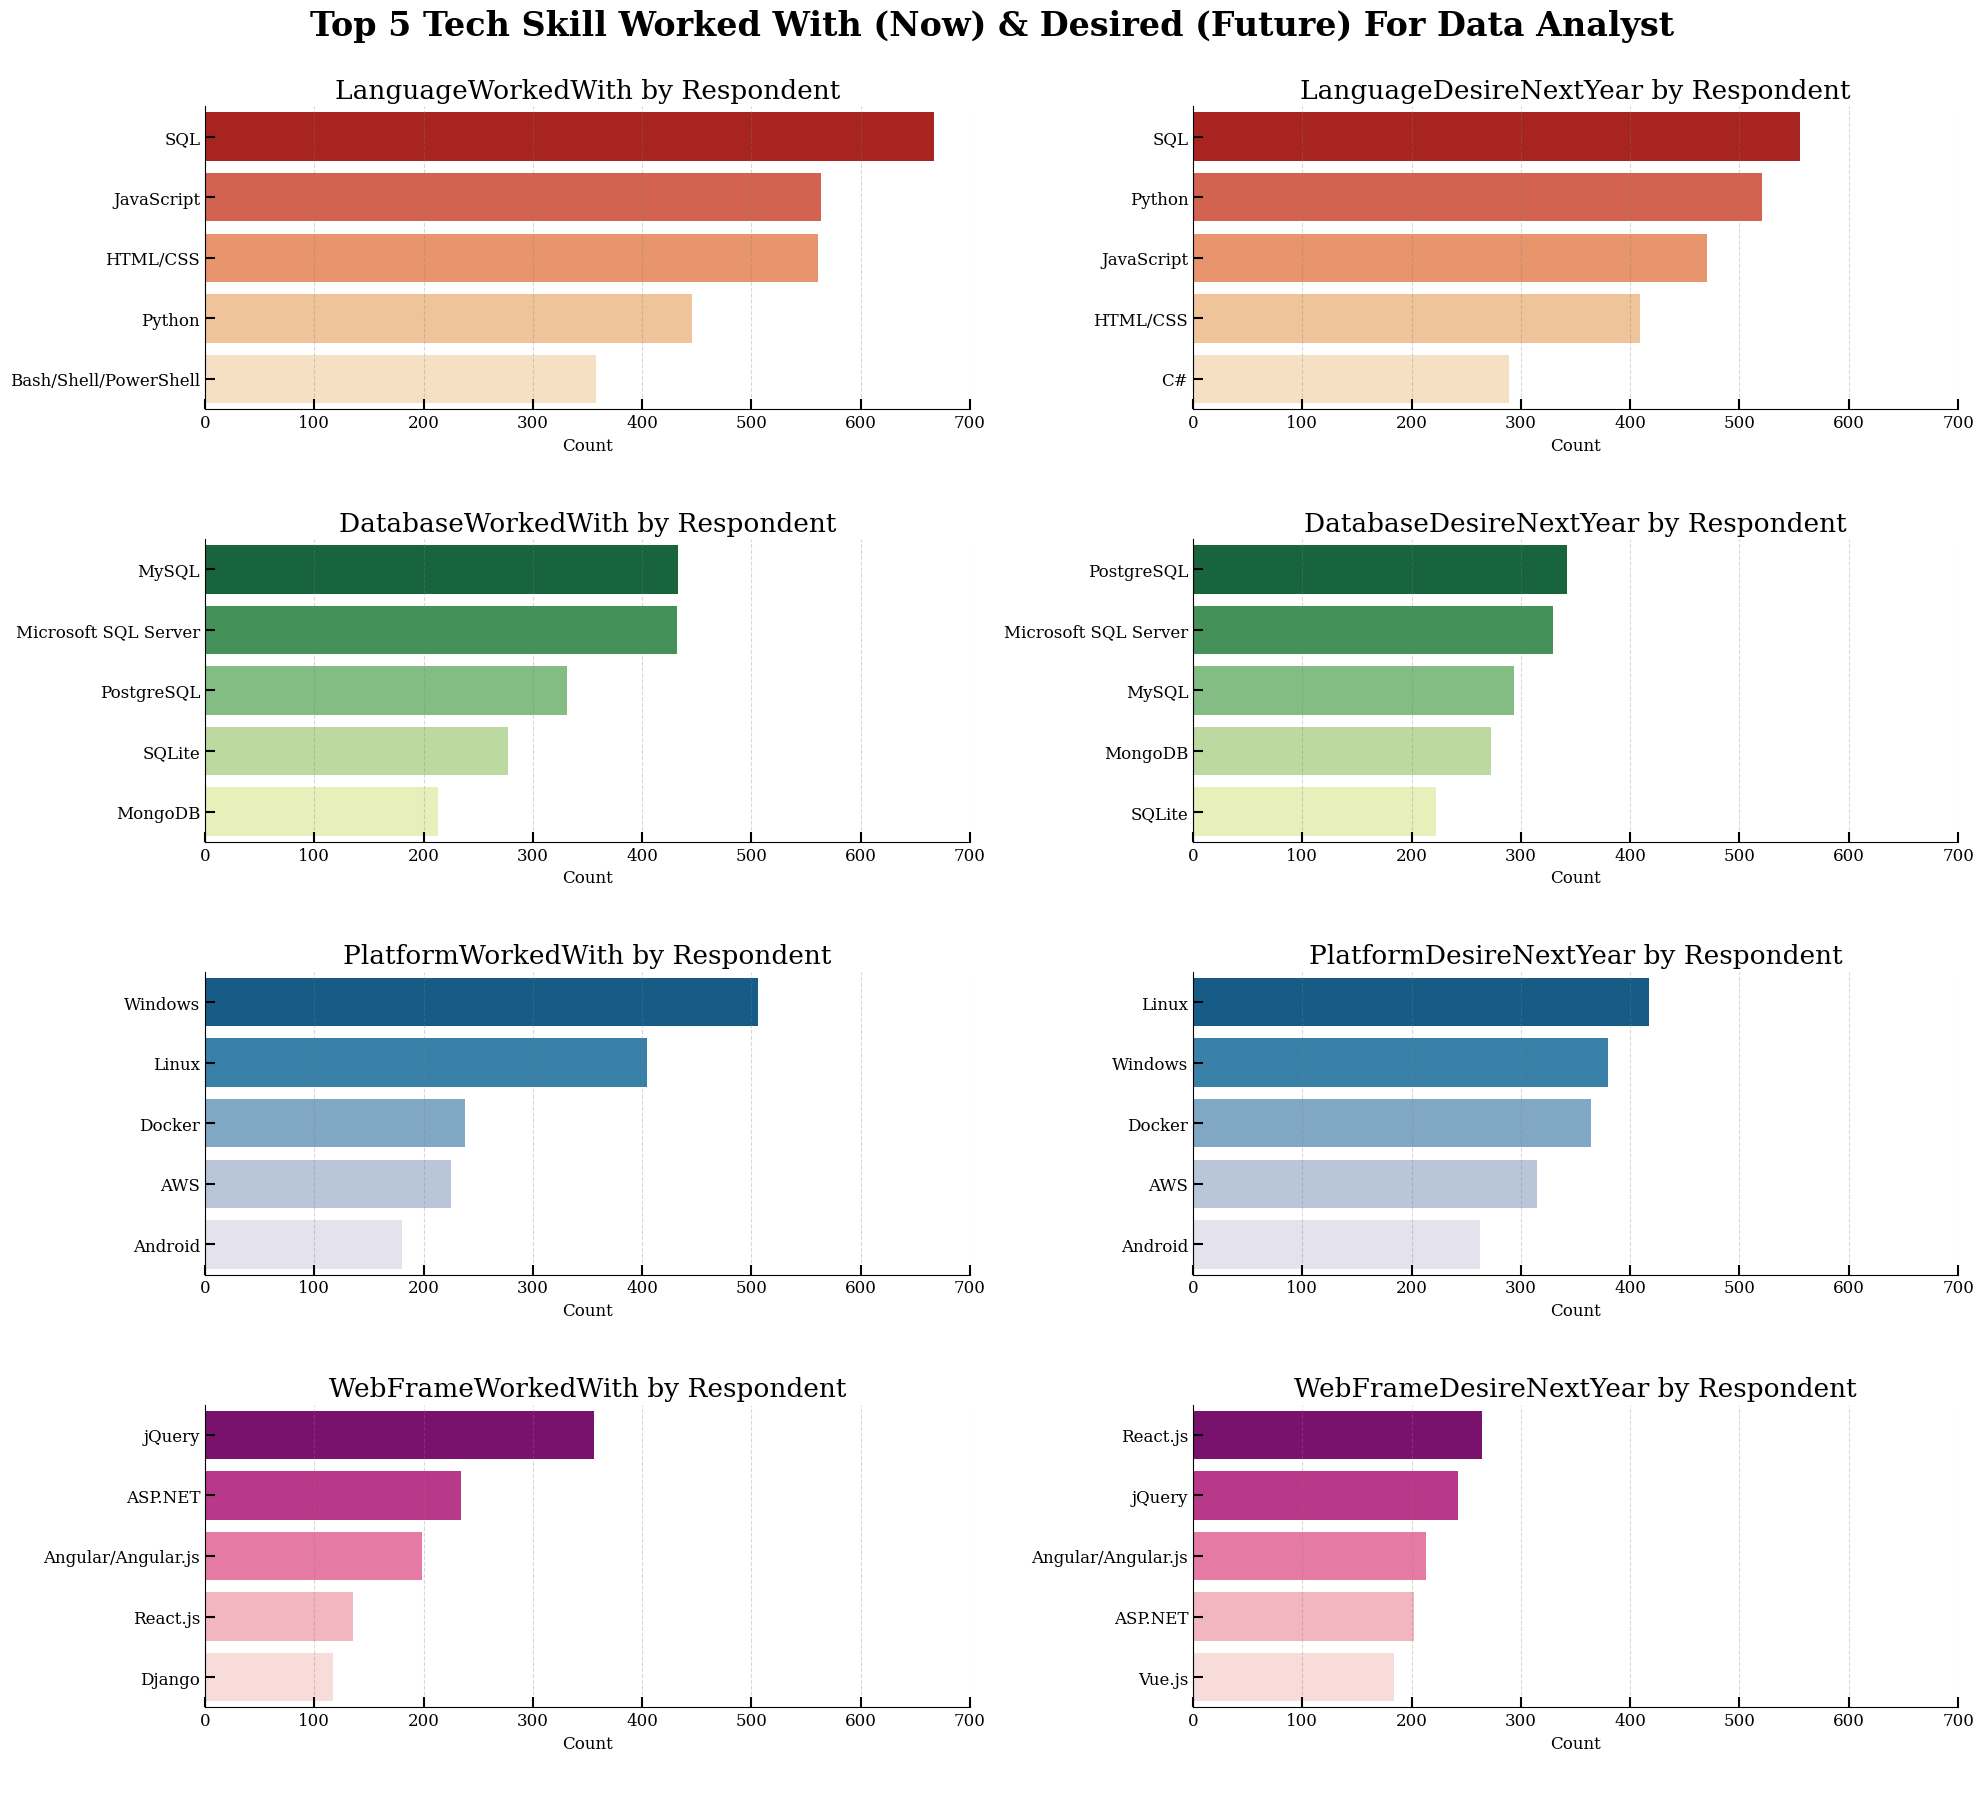

In [44]:
pal = ['OrRd_r', 'OrRd_r', 'YlGn_r', 'YlGn_r', 'PuBu_r', 'PuBu_r', 'RdPu_r', 'RdPu_r']

fig = plt.figure(figsize=(20,18))
for i in range(1, DA_tech.shape[1]-1):
    ax = fig.add_subplot(4,2,i)
    sns.countplot(y=DA_tech.columns[i], data=DA_tech, order=DA_tech[DA_tech.columns[i]].value_counts().head(5).index, palette=pal[i-1])
    #plt.bar_label(ax.containers[0])
    plt.title(f'{DA_tech.columns[i]} by Respondent', size=19)
    ax.set(xlabel='Count\n\n')
    ax.set(ylabel=None)
    ax.set(xlim=(0,700))
plt.suptitle('Top 5 Tech Skill Worked With (Now) & Desired (Future) For Data Analyst', y=1., size=24, weight='bold')
plt.tight_layout()
sns.despine()

Based on a survey conducted on professional data analysts, the most widely used programming languages today are `SQL, JavaScript, HTML, Python,` and `Bash`. Another programming language that will be desired in the next few years (besides the one used now) is `C#`.

The most widely used databases today are `MySQL, Microsoft SQL, PostgreSQL, SQLite,` and `MongoDB`. The desired database in the next few years tends to be the same as the database that is currently used.

Then, the most widely used platforms today are `Windows, Linux, Docker, AWS,` and `Android`. The desired platform in the next few years tends to be the same as the platform currently used.

For Web Frames, the most used today are `jQuery, ASP.NET, Angular, React.js,` and `Django`. Another Web Frame that will be desired in the next few years is `Vue.js`.

### 📌 Formal Education Level - DA

In [45]:
DA_demo = df_demo[df_demo['Respondent'].isin(DA_job)].reset_index(drop=True)

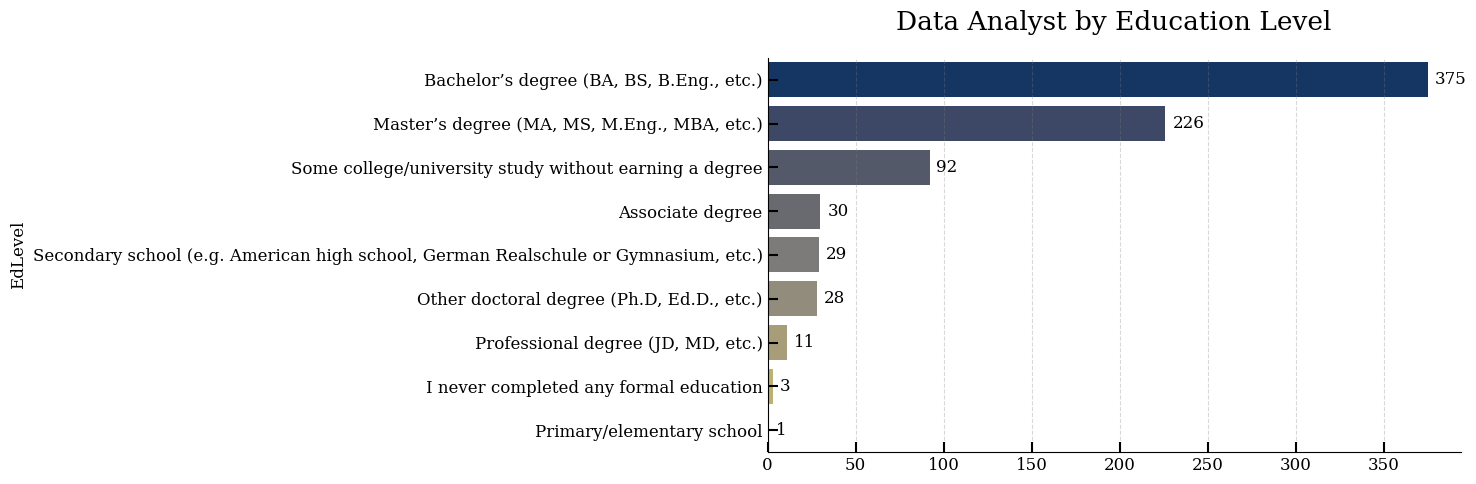

In [46]:
fig = plt.figure(figsize=(22,5))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='EdLevel',data=DA_demo, order=DA_demo['EdLevel'].value_counts().index, palette='cividis')
plt.bar_label(ax.containers[0], padding=5)
ax.set(xlabel=None)
plt.title('Data Analyst by Education Level', pad=20, size=19)
plt.tight_layout()
sns.despine()

The majority of the last educational level for the data analyst profession is Bachelor Degree. After that, other education levels are Master Degree and some college/university study (without degree). The distribution of the last educational level of the Data Analyst profession tends to be the same as the distribution for all developer professions as shown previously.

### 📌 Undergrad Major / Field of Study - DA

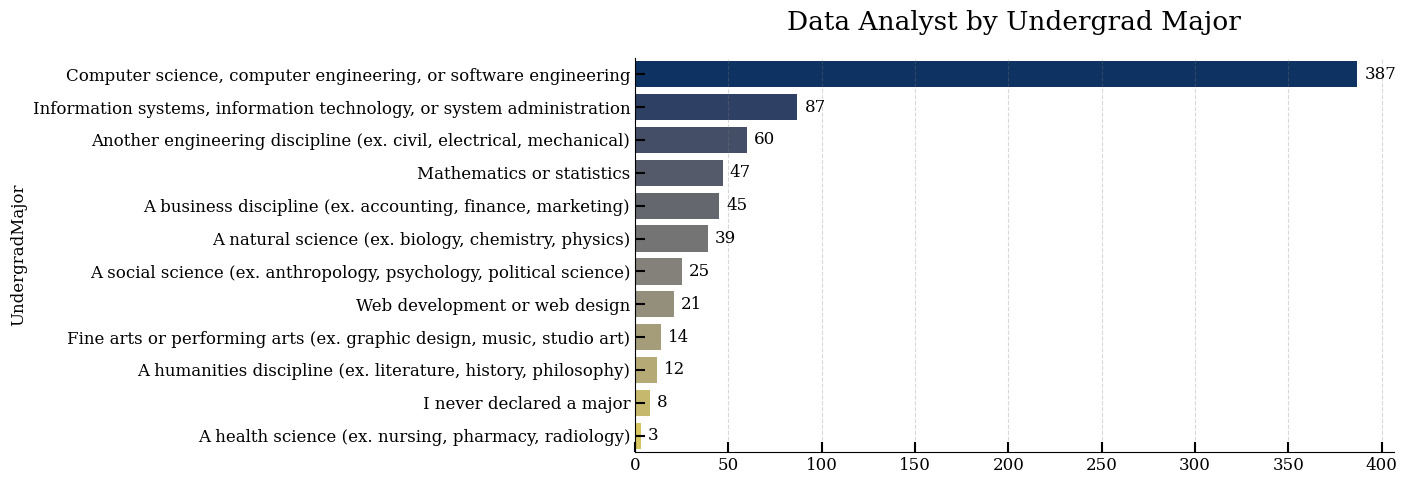

In [47]:
fig = plt.figure(figsize=(22,5))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='UndergradMajor',data=DA_demo, order=DA_demo['UndergradMajor'].value_counts().index, palette='cividis')
plt.bar_label(ax.containers[0], padding=5)
ax.set(xlabel=None)
plt.title('Data Analyst by Undergrad Major', pad=20, size=19)
plt.tight_layout()
sns.despine()

The majority of the majors taken by the Data Analyst are computer science/computer engineering/software engineering. In addition, other majors taken are information systems/information technology/system administration; and non-IT engineering. Almost all majors taken by respondents with the Data Analyst profession are also majors in the IT field. **The majors that tend to be more in the Data Analyst profession than other developer professions are mathematics/statistics.**

### 📌 Non-degree Education - DA

In [48]:
df_nondeg = DA_demo[['Respondent', 'EduOther']]
for i in range(df_nondeg.shape[0]):
    try:
        df_nondeg['EduOther'][i] = df_nondeg['EduOther'][i].split(';')
    except:
        pass
df_nondeg = df_nondeg.explode('EduOther', ignore_index=True)

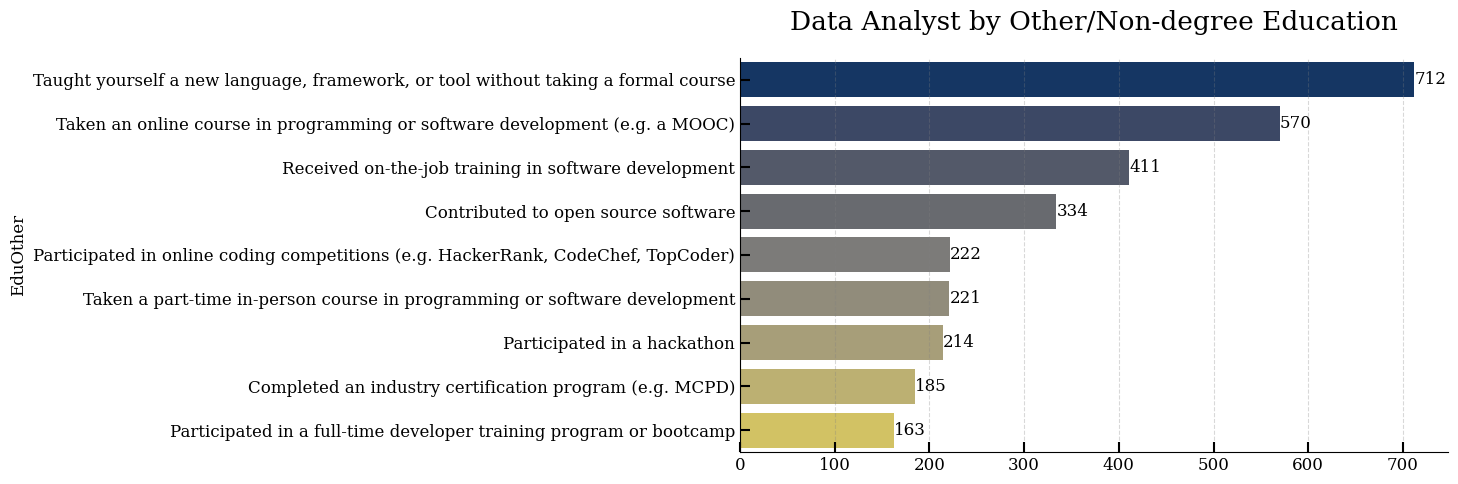

In [49]:
fig = plt.figure(figsize=(22,5))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='EduOther',data=df_nondeg, order=df_nondeg['EduOther'].value_counts().index, palette='cividis')
plt.bar_label(ax.containers[0])
ax.set(xlabel=None)
plt.title('Data Analyst by Other/Non-degree Education', pad=20, size=19)
plt.tight_layout()
sns.despine()

The non-formal activities/education most used by respondents with the Data Analyst profession are self-taught, online courses, and on-the-job training. The distribution of Data Analyst's non-formal education tends to be the same as the distribution for all developer professions as shown earlier.

### 📌 Annual Salary - DA

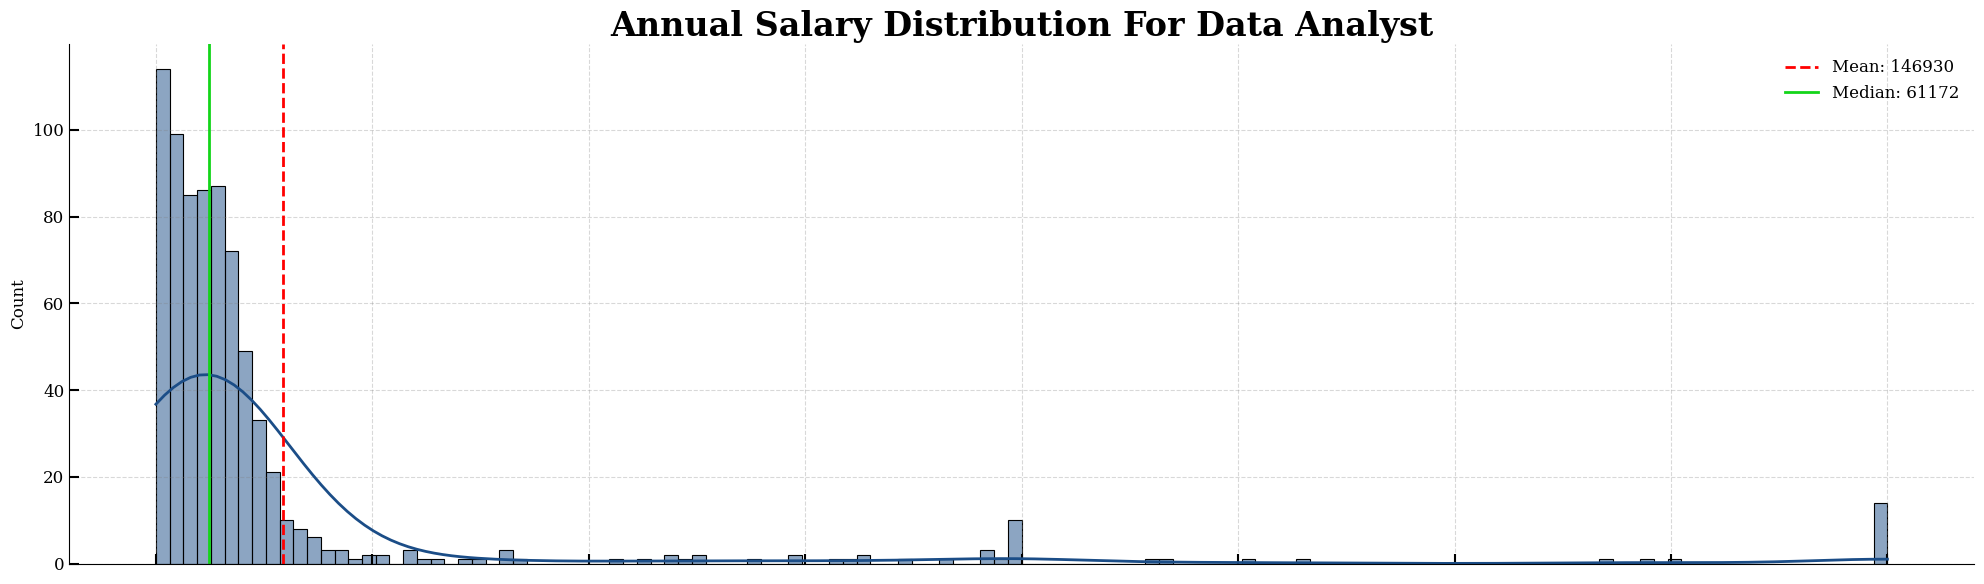

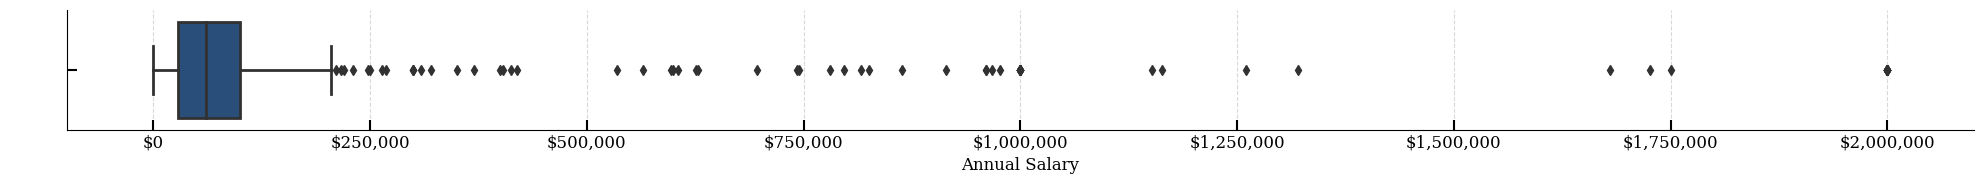

In [50]:
fmt = '${x:,.0f}'
tick = matplotlib.ticker.StrMethodFormatter(fmt)
data = DA_demo[DA_demo['ConvertedComp'] != 0]

fig = plt.figure(figsize=(20,6))
sns.histplot(x='ConvertedComp', data=data, kde=True, color='#1B4D87')
plt.axvline(data['ConvertedComp'].mean(), color='red', linestyle='--', label='Mean: {:.0f}'.format(data['ConvertedComp'].mean()))
plt.axvline(data['ConvertedComp'].median(), color='#13D519', linestyle='-', label='Median: {:.0f}'.format(data['ConvertedComp'].median()))
plt.legend()
plt.title('Annual Salary Distribution For Data Analyst', size=24, weight='bold')
plt.xlabel(None)
plt.gca().set_xticklabels([])
plt.tight_layout()

fig = plt.figure(figsize=(20,2))
ax = sns.boxplot(x='ConvertedComp',data=data, color='#1B4D87')
plt.ylabel(' ', labelpad=25)
ax.xaxis.set_major_formatter(tick)
plt.xlabel('Annual Salary')
plt.tight_layout()
sns.despine()

In [51]:
df_temp = DA_demo[DA_demo['ConvertedComp'] != 0]
df_salary_da = df_temp['ConvertedComp'].describe().round().to_frame().T
df_salary_da

,count,mean,std,min,25%,50%,75%,max
ConvertedComp,743.0,146930.0,332888.0,10.0,27986.0,61172.0,100000.0,2000000.0


The annual salary distribution of respondents with the Data Analyst profession is in the form of a right-skewed distribution. The majority of annual salaries are in the range of \\$28,000-\\$100,000. The largest annual salary in this dataset is $2,000,000. The distribution of the Data Analyst's annual salary also tends to be similar to the distribution of all developers shown previously.

### 📌 Annual Salary Comparison For Total Skill(s) Used by Data Analyst

In [52]:
DA_tech['Salary'] = 0
for i in range(DA_tech.shape[0]):
    respondent = DA_tech['Respondent'][i]
    DA_tech['Salary'][i] = DA_demo[DA_demo['Respondent'] == respondent].ConvertedComp.values[0]

In [53]:
DA_skills = DA_tech.groupby('Respondent').agg({'LanguageWorkedWith':'count', 'DatabaseWorkedWith':'count', 
                                               'PlatformWorkedWith':'count', 'WebFrameWorkedWith':'count', 'Salary':'mean'}).reset_index()

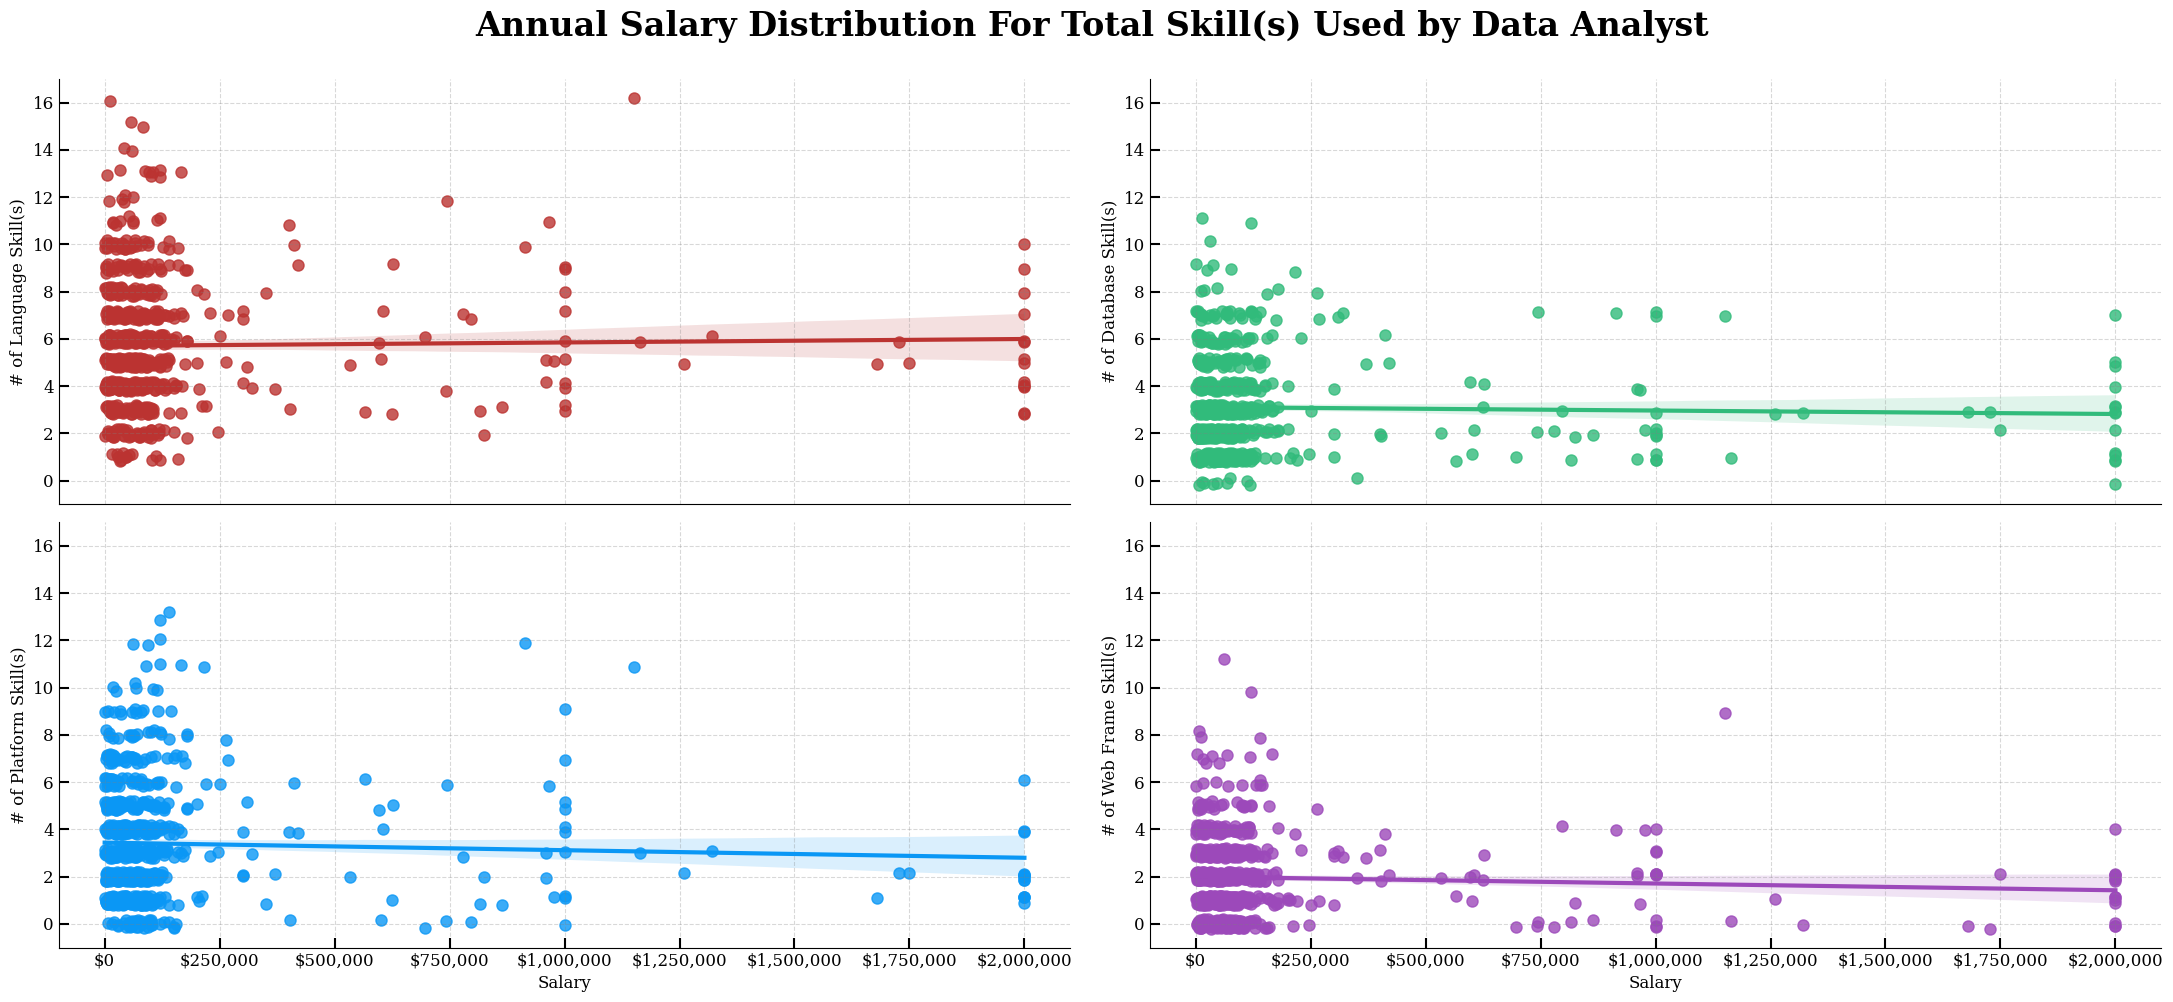

In [54]:
tech = ['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith']
colors = ['#BB3331', '#31BB7B', '#0A97F5', '#9C49BA']
labels = ['Language', 'Database', 'Platform', 'Web Frame']

fig = plt.figure(figsize=(22,10))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    sns.regplot(x='Salary', y=tech[i], data=DA_skills, color=colors[i], y_jitter=.2, marker='o', scatter_kws={'alpha': 0.8})
    plt.ylabel(f'# of {labels[i]} Skill(s)')
    ax.xaxis.set_major_formatter(tick)
    ax.set(ylim=(-1,17))
    if i < 2 :
        ax.set(xticklabels=[])  
        ax.set(xlabel=None)
        ax.tick_params(bottom=False)
    else:
       ax.xaxis.set_major_formatter(tick)
    
plt.suptitle('Annual Salary Distribution For Total Skill(s) Used by Data Analyst', y=1, fontsize=24, weight='bold')
plt.tight_layout()
sns.despine()

From the graph above, it can be seen that the total number of tech skills possessed does not have a significant correlation with the annual salary of a data analyst. While it may appear that possessing numerous technical skills enhances one's value and competency, this finding suggests that several other variables exhibit a more substantial correlation with the annual salary.

### 📌 Annual Salary Comparison For Each Tech Skills - DA

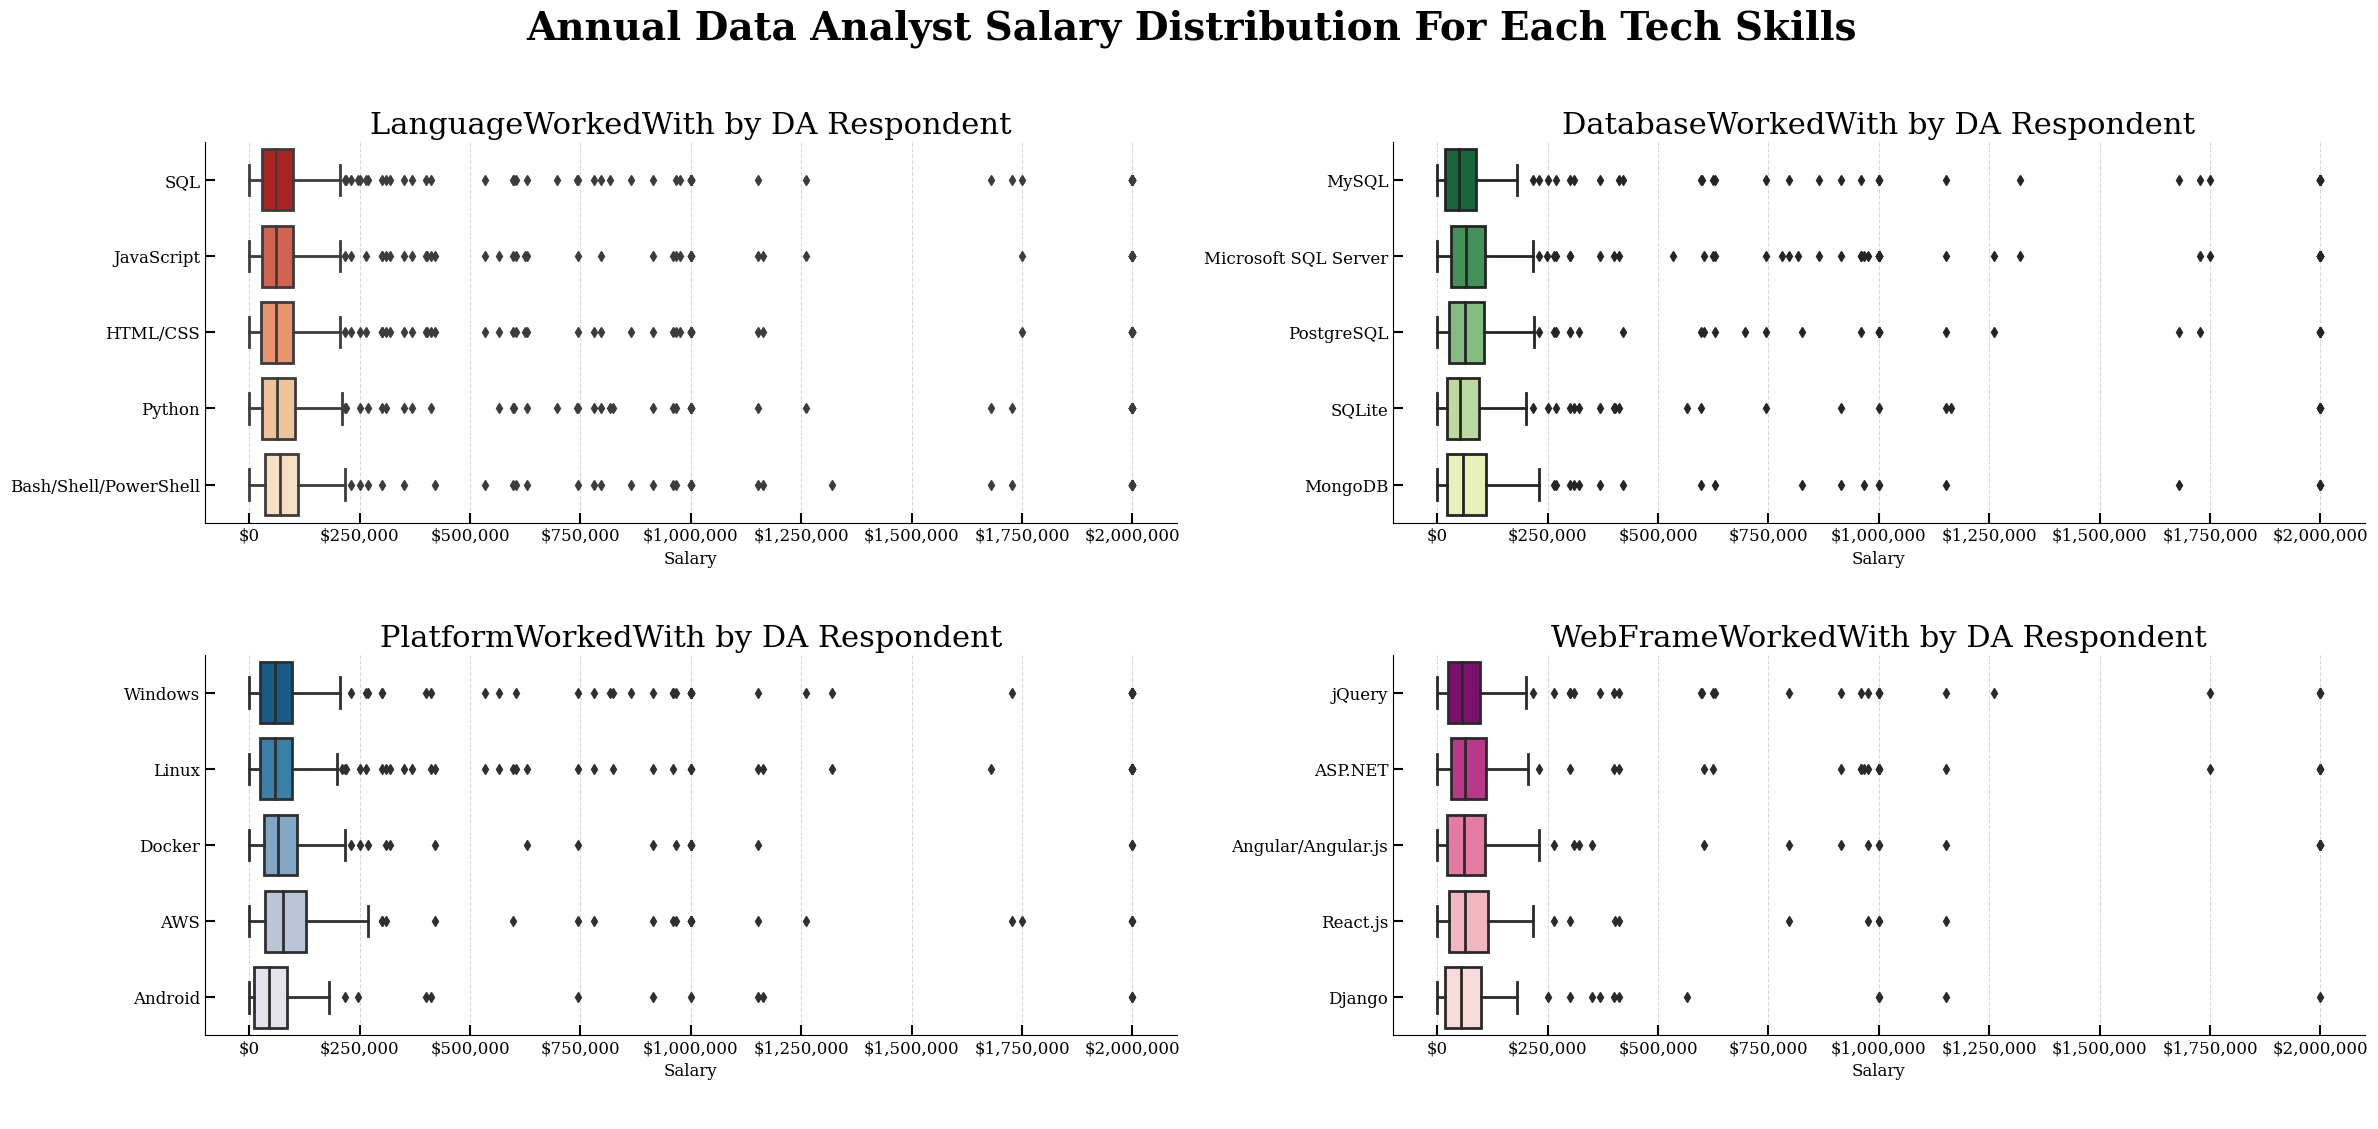

In [55]:
cols = ['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith']
pal = ['OrRd_r', 'YlGn_r', 'PuBu_r', 'RdPu_r']

fig = plt.figure(figsize=(24,11))
for i in range(len(cols)):
    ax = fig.add_subplot(2,2,i+1)
    sns.boxplot(x='Salary', y=cols[i], data=DA_tech, order=DA_tech[cols[i]].value_counts().head(5).index,  palette=pal[i])
    ax.xaxis.set_major_formatter(tick)
    ax.set(ylabel=None)
    ax.set(xlabel='Salary\n\n')
    plt.title(cols[i] + ' by DA Respondent', fontsize=22)
plt.suptitle('Annual Data Analyst Salary Distribution For Each Tech Skills', y=1.025, fontsize=28, weight='bold')
plt.tight_layout()
sns.despine()

From the graph above, it can be seen that there is no significant difference in the annual salary distribution between each tech skill in the language, database, platform, and web frame features. Hence, it is prudent to select our technical skills based on employer demand, prevalent choices within the professional domain, industry preferences, and similar factors.

# Conclusion
---

To ensure clarity, I will focus solely on findings and implications pertinent to the ***data analyst*** job title in this conclusion section.

### 1. Tech Skill(s)

- Based on a survey conducted on professional data analysts, the most widely used programming languages today are `SQL, JavaScript, HTML, Python,` and `Bash`. Another programming language that will be desired in the next few years (besides the current one used / worked with) is `C#`.
    - `C#` is gaining popularity among data analysts due to its versatility, integration with the Microsoft ecosystem, performance, scalability, and cross-platform development capabilities. Its robust features make it well-suited for handling complex data analysis tasks and building scalable solutions for varying business needs.
- The most widely used databases today are `MySQL, Microsoft SQL, PostgreSQL, SQLite,` and `MongoDB`. The desired database in the next few years tends to be the same as the database that is currently used. In other words, data professionals are satisfied with their current choice of database and see it as the preferred option for their future needs as well. This suggests a level of stability and confidence in the chosen database technology within the data analysis community.
- Then, the most widely used platforms today are `Windows, Linux, Docker, AWS,` and `Android`. The desired platform in the next few years tends to be the same as the platform currently used. The implications are generally similar like databases.
- For Web Frames, the most used today are `jQuery, ASP.NET, Angular, React.js,` and `Django`. Another Web Frame that will be desired in the next few years is `Vue.js`.
    - `Vue.js` is expected to be desired by data analysts in the future due to its lightweight and flexible nature, ease of integration with existing projects, growing community support, and its capability to build dynamic and responsive user interfaces efficiently.

### 2. Demographic Information(s)

- The majority of data analysts hold Bachelor's or Master's degrees, with some having completed college/university studies without obtaining a degree.
- Common majors among data analysts include computer science, information systems, and non-IT engineering, with a higher prevalence of mathematics and statistics majors compared to other developer professions.
- Non-formal education activities frequently pursued by data analysts include self-teaching, online courses, and on-the-job training.
- Annual salary distribution among data analysts typically falls within the range of \\$28,000 to \\$100,000, with the highest reported salary reaching \\$2,000,000.
- Demographic characteristics such as formal education level, major, non-degree education, age, and salary are generally similar between data analysts and other IT professionals surveyed.

### 3. Salary Comparison Using Tech Skill(s)

Finally, for a data analyst, the total number of IT skills mastered or the use of certain IT skills does not affect the amount of annual salary that will be earned. While it may appear that possessing numerous technical skills enhances one's value and competency, this finding suggests that several other variables exhibit a more substantial correlation with the annual salary.
Therefore, there are other aspects that are likely to have a greater influence on the annual salary that a data analyst earns.